In [34]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
pd.options.mode.chained_assignment = None

In [2]:
xml_data = open('data.xml', 'r', encoding='utf-8').read()  # Read file
root = ET.XML(xml_data)  # Parse XML
root

<Element '{http://www.SDMX.org/resources/SDMXML/schemas/v1_0/message}GenericData' at 0x000002AEFC50ECF0>

In [3]:
data = []
cols = ["Num", "Time", "Okato", "Period", "Proc"]

codesOkato = []
colsOkato= ["Okato", "Name"]

for i, c in enumerate(root):
    if(i == 1):
        for j, cod in enumerate(c[0]):
            if "Code" in cod.tag:
                #time = val.text
                okatotext = cod[0].text
                ocatocode = cod.attrib["value"]
                #print(cod.attrib["value"])
                #print(cod[0].text)
                codesOkato.append([ocatocode, okatotext])
            
    if(i == 3):
        for j, series in enumerate(c):
            #print(j)
            for l, node in enumerate(series):
                for m, val in enumerate(node):
                    if "Time" in val.tag:
                        time = val.text
                        #print(val.text)
                    
                    if "SeriesKey" in node.tag:
                        okato = val.attrib["value"]
                        #print(val.attrib["concept"])
                        #print(val.attrib["value"])
                    
                    if "Attributes" in node.tag:
                        if(val.attrib["concept"] == "PERIOD"):
                            period = val.attrib["value"]
                        #print(val.attrib["concept"])
                        #print(val.attrib["value"])
                    
                    if "ObsValue" in val.tag:
                        proc = val.attrib["value"]
                        #print(val.attrib["value"])
                    #print(val.attrib.items())
                    #print(val.items)
                    #print(val.tag)
                    
                    #print(val.attrib)
            data.append([j, time, okato, period, proc])

data        

[[0, '2019', '643', 'январь-декабрь', '2'],
 [1, '2020', '643', 'январь-декабрь', '3,9'],
 [2, '2021', '643', 'январь-март', '4,3'],
 [3, '2021', '643', 'январь-декабрь', '4,8'],
 [4, '2022', '643', 'январь-март', '5,9'],
 [5, '2019', '030', 'январь-декабрь', '3,2'],
 [6, '2020', '030', 'январь-декабрь', '6,1'],
 [7, '2021', '030', 'январь-март', '6,4'],
 [8, '2021', '030', 'январь-декабрь', '6,4'],
 [9, '2022', '030', 'январь-март', '7,6'],
 [10, '2019', '14000000000', 'январь-декабрь', '1'],
 [11, '2020', '14000000000', 'январь-декабрь', '2,1'],
 [12, '2021', '14000000000', 'январь-март', '2,8'],
 [13, '2021', '14000000000', 'январь-декабрь', '3,5'],
 [14, '2022', '14000000000', 'январь-март', '4,1'],
 [15, '2019', '15000000000', 'январь-декабрь', '0,5'],
 [16, '2020', '15000000000', 'январь-декабрь', '1,3'],
 [17, '2021', '15000000000', 'январь-март', '0,9'],
 [18, '2021', '15000000000', 'январь-декабрь', '1,4'],
 [19, '2022', '15000000000', 'январь-март', '3,3'],
 [20, '2019', '170

In [4]:


dfokato = pd.DataFrame(codesOkato)
dfokato.columns = colsOkato  # Update column names
print(dfokato)

           Okato                           Name
0            643           Российская Федерация
1            030  Центральный федеральный округ
2    14000000000           Белгородская область
3    15000000000               Брянская область
4    17000000000           Владимирская область
..           ...                            ...
97   44000000000            Магаданская область
98   64000000000            Сахалинская область
99   99000000000   Еврейская автономная область
100  77000000000     Чукотский автономный округ
101          039     Крымский федеральный округ

[102 rows x 2 columns]


In [5]:
df = pd.DataFrame(data)  # Write in DF and transpose it
df.columns = cols  # Update column names
print(df)

     Num  Time        Okato          Period Proc
0      0  2019          643  январь-декабрь    2
1      1  2020          643  январь-декабрь  3,9
2      2  2021          643     январь-март  4,3
3      3  2021          643  январь-декабрь  4,8
4      4  2022          643     январь-март  5,9
..   ...   ...          ...             ...  ...
448  448  2019  99000000000  январь-декабрь  0,3
449  449  2020  99000000000  январь-декабрь  0,9
450  450  2021  99000000000     январь-март  0,9
451  451  2021  99000000000  январь-декабрь    1
452  452  2022  99000000000     январь-март    1

[453 rows x 5 columns]


In [6]:
df_filter = df['Okato'].isin(['643'])
filtered = df[df_filter]

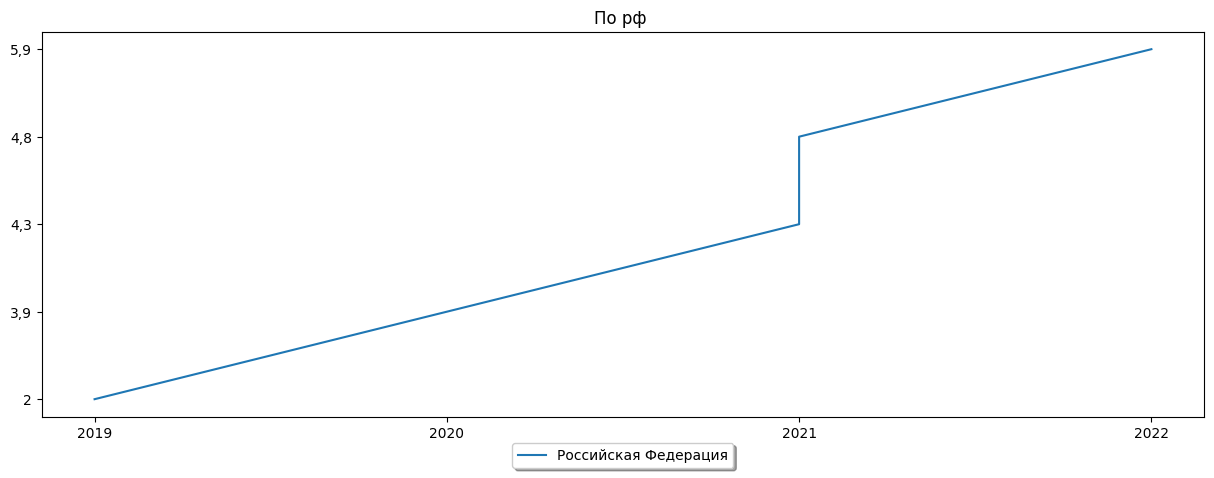

In [7]:

fig, ax = plt.subplots(figsize=(15,5))
plt.title('По рф ')
plt.plot(filtered['Time'], filtered['Proc'], label='Российская Федерация')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
plt.show()

In [8]:
print('Previous Datatypes\n', df.dtypes, sep='')

#df["Proc"] = pd.to_numeric(df["Proc"])
df['Proc'] = [x.replace(',', '.') for x in df['Proc']]

df['Proc'] = df['Proc'].astype(float)

df

Previous Datatypes
Num        int64
Time      object
Okato     object
Period    object
Proc      object
dtype: object


Num  Time        Okato          Period  Proc
0      0  2019          643  январь-декабрь   2.0
1      1  2020          643  январь-декабрь   3.9
2      2  2021          643     январь-март   4.3
3      3  2021          643  январь-декабрь   4.8
4      4  2022          643     январь-март   5.9
..   ...   ...          ...             ...   ...
448  448  2019  99000000000  январь-декабрь   0.3
449  449  2020  99000000000  январь-декабрь   0.9
450  450  2021  99000000000     январь-март   0.9
451  451  2021  99000000000  январь-декабрь   1.0
452  452  2022  99000000000     январь-март   1.0

[453 rows x 5 columns]

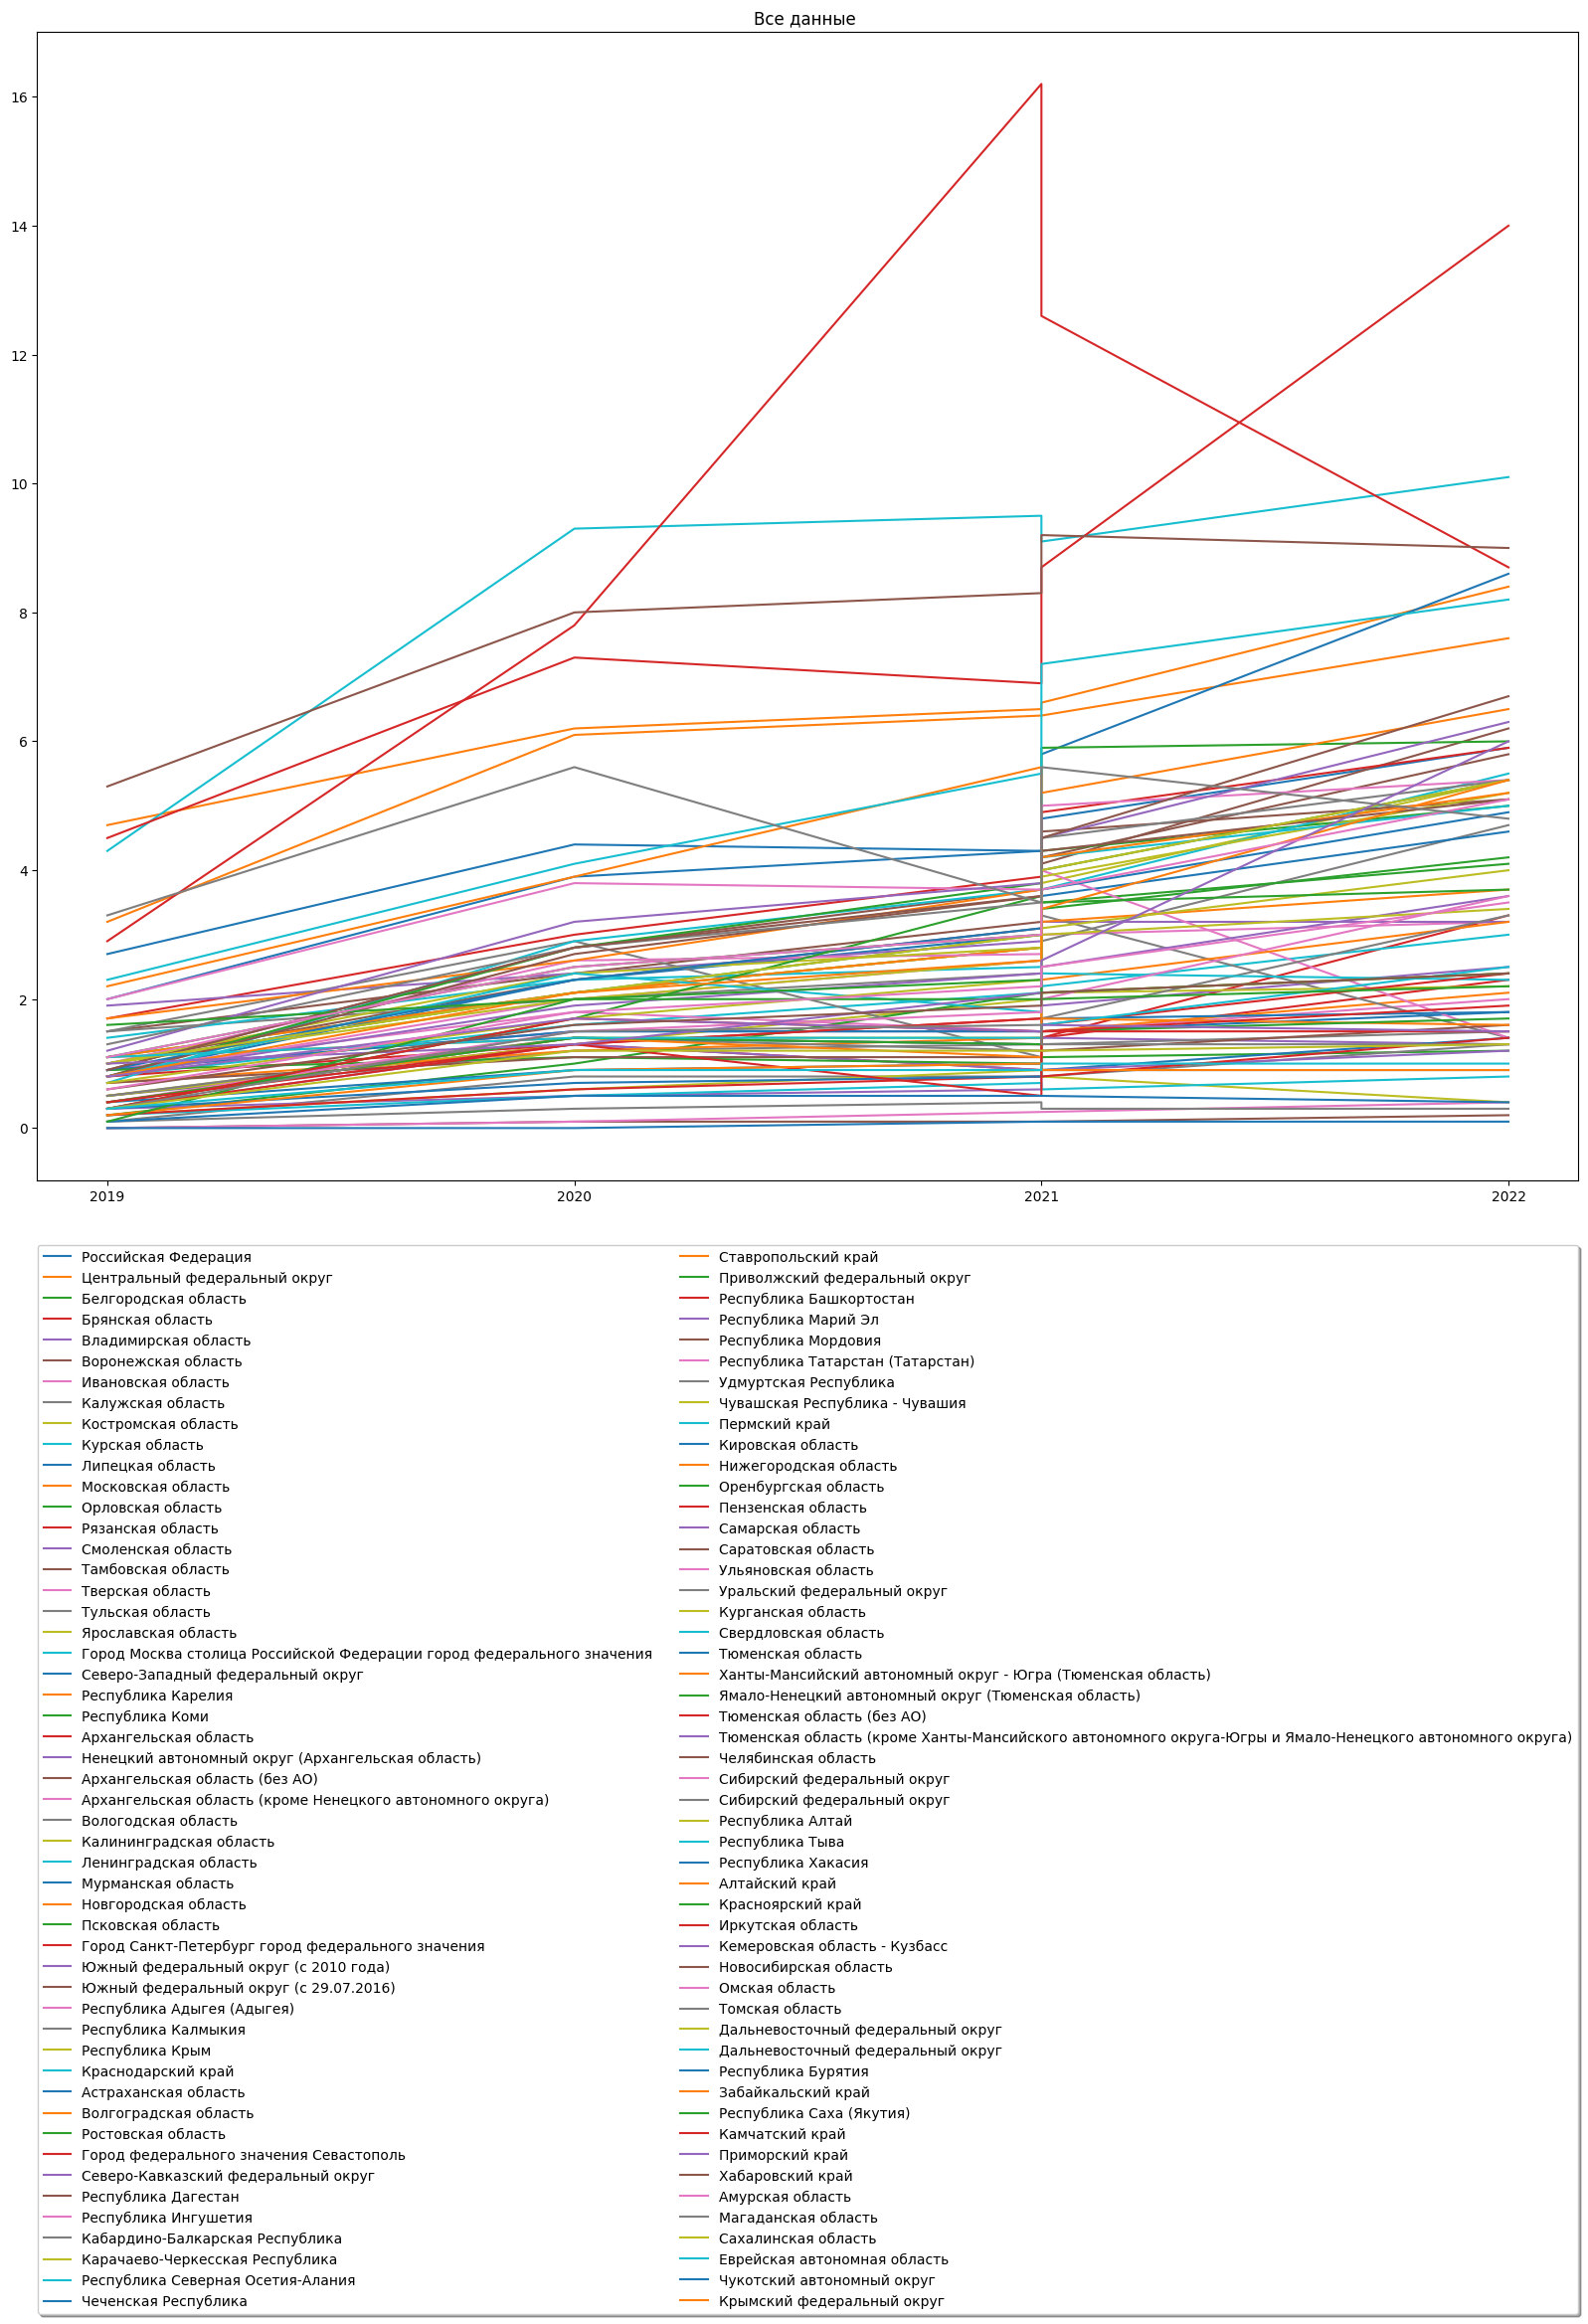

In [9]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title('Все данные ')



for index, okatorow in dfokato.iterrows():
    
    #print(okatorow['Okato'] + " - " + okatorow['Name'])
    df_filter = df['Okato'].isin([okatorow['Okato']])
    filtered = df[df_filter]
    plt.plot(filtered['Time'], filtered['Proc'], label=okatorow['Name'])



plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
plt.show()

In [10]:
print('Previous Datatypes\n', df.dtypes, sep='')

df

Previous Datatypes
Num         int64
Time       object
Okato      object
Period     object
Proc      float64
dtype: object


Num  Time        Okato          Period  Proc
0      0  2019          643  январь-декабрь   2.0
1      1  2020          643  январь-декабрь   3.9
2      2  2021          643     январь-март   4.3
3      3  2021          643  январь-декабрь   4.8
4      4  2022          643     январь-март   5.9
..   ...   ...          ...             ...   ...
448  448  2019  99000000000  январь-декабрь   0.3
449  449  2020  99000000000  январь-декабрь   0.9
450  450  2021  99000000000     январь-март   0.9
451  451  2021  99000000000  январь-декабрь   1.0
452  452  2022  99000000000     январь-март   1.0

[453 rows x 5 columns]

In [11]:
from datetime import datetime


def get_month(period):
    if(period == "январь-декабрь"):
        return("12")
    elif(period == "январь-март"):
        return("03")
    else:
        print("Не совпадает период ", period)

def to_date(str):
    return datetime.strptime(str,'%d.%m.%Y')


df['Date'] = df.apply(lambda x: to_date(f'31.{get_month(x["Period"])}.{x["Time"]}') , axis=1) 

print('Previous Datatypes\n', df.dtypes, sep='')
df

Previous Datatypes
Num                int64
Time              object
Okato             object
Period            object
Proc             float64
Date      datetime64[ns]
dtype: object


Num  Time        Okato          Period  Proc       Date
0      0  2019          643  январь-декабрь   2.0 2019-12-31
1      1  2020          643  январь-декабрь   3.9 2020-12-31
2      2  2021          643     январь-март   4.3 2021-03-31
3      3  2021          643  январь-декабрь   4.8 2021-12-31
4      4  2022          643     январь-март   5.9 2022-03-31
..   ...   ...          ...             ...   ...        ...
448  448  2019  99000000000  январь-декабрь   0.3 2019-12-31
449  449  2020  99000000000  январь-декабрь   0.9 2020-12-31
450  450  2021  99000000000     январь-март   0.9 2021-03-31
451  451  2021  99000000000  январь-декабрь   1.0 2021-12-31
452  452  2022  99000000000     январь-март   1.0 2022-03-31

[453 rows x 6 columns]

Пустая последовательность  Архангельская область (без АО)
Пустая последовательность  Архангельская область (кроме Ненецкого автономного округа)
Пустая последовательность  Южный федеральный округ (с 2010 года)
Пустая последовательность  Тюменская область (без АО)
Пустая последовательность  Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)
Пустая последовательность  Сибирский федеральный округ
Пустая последовательность  Сибирский федеральный округ
Пустая последовательность  Дальневосточный федеральный округ
Пустая последовательность  Дальневосточный федеральный округ
Пустая последовательность  Чукотский автономный округ
Пустая последовательность  Крымский федеральный округ


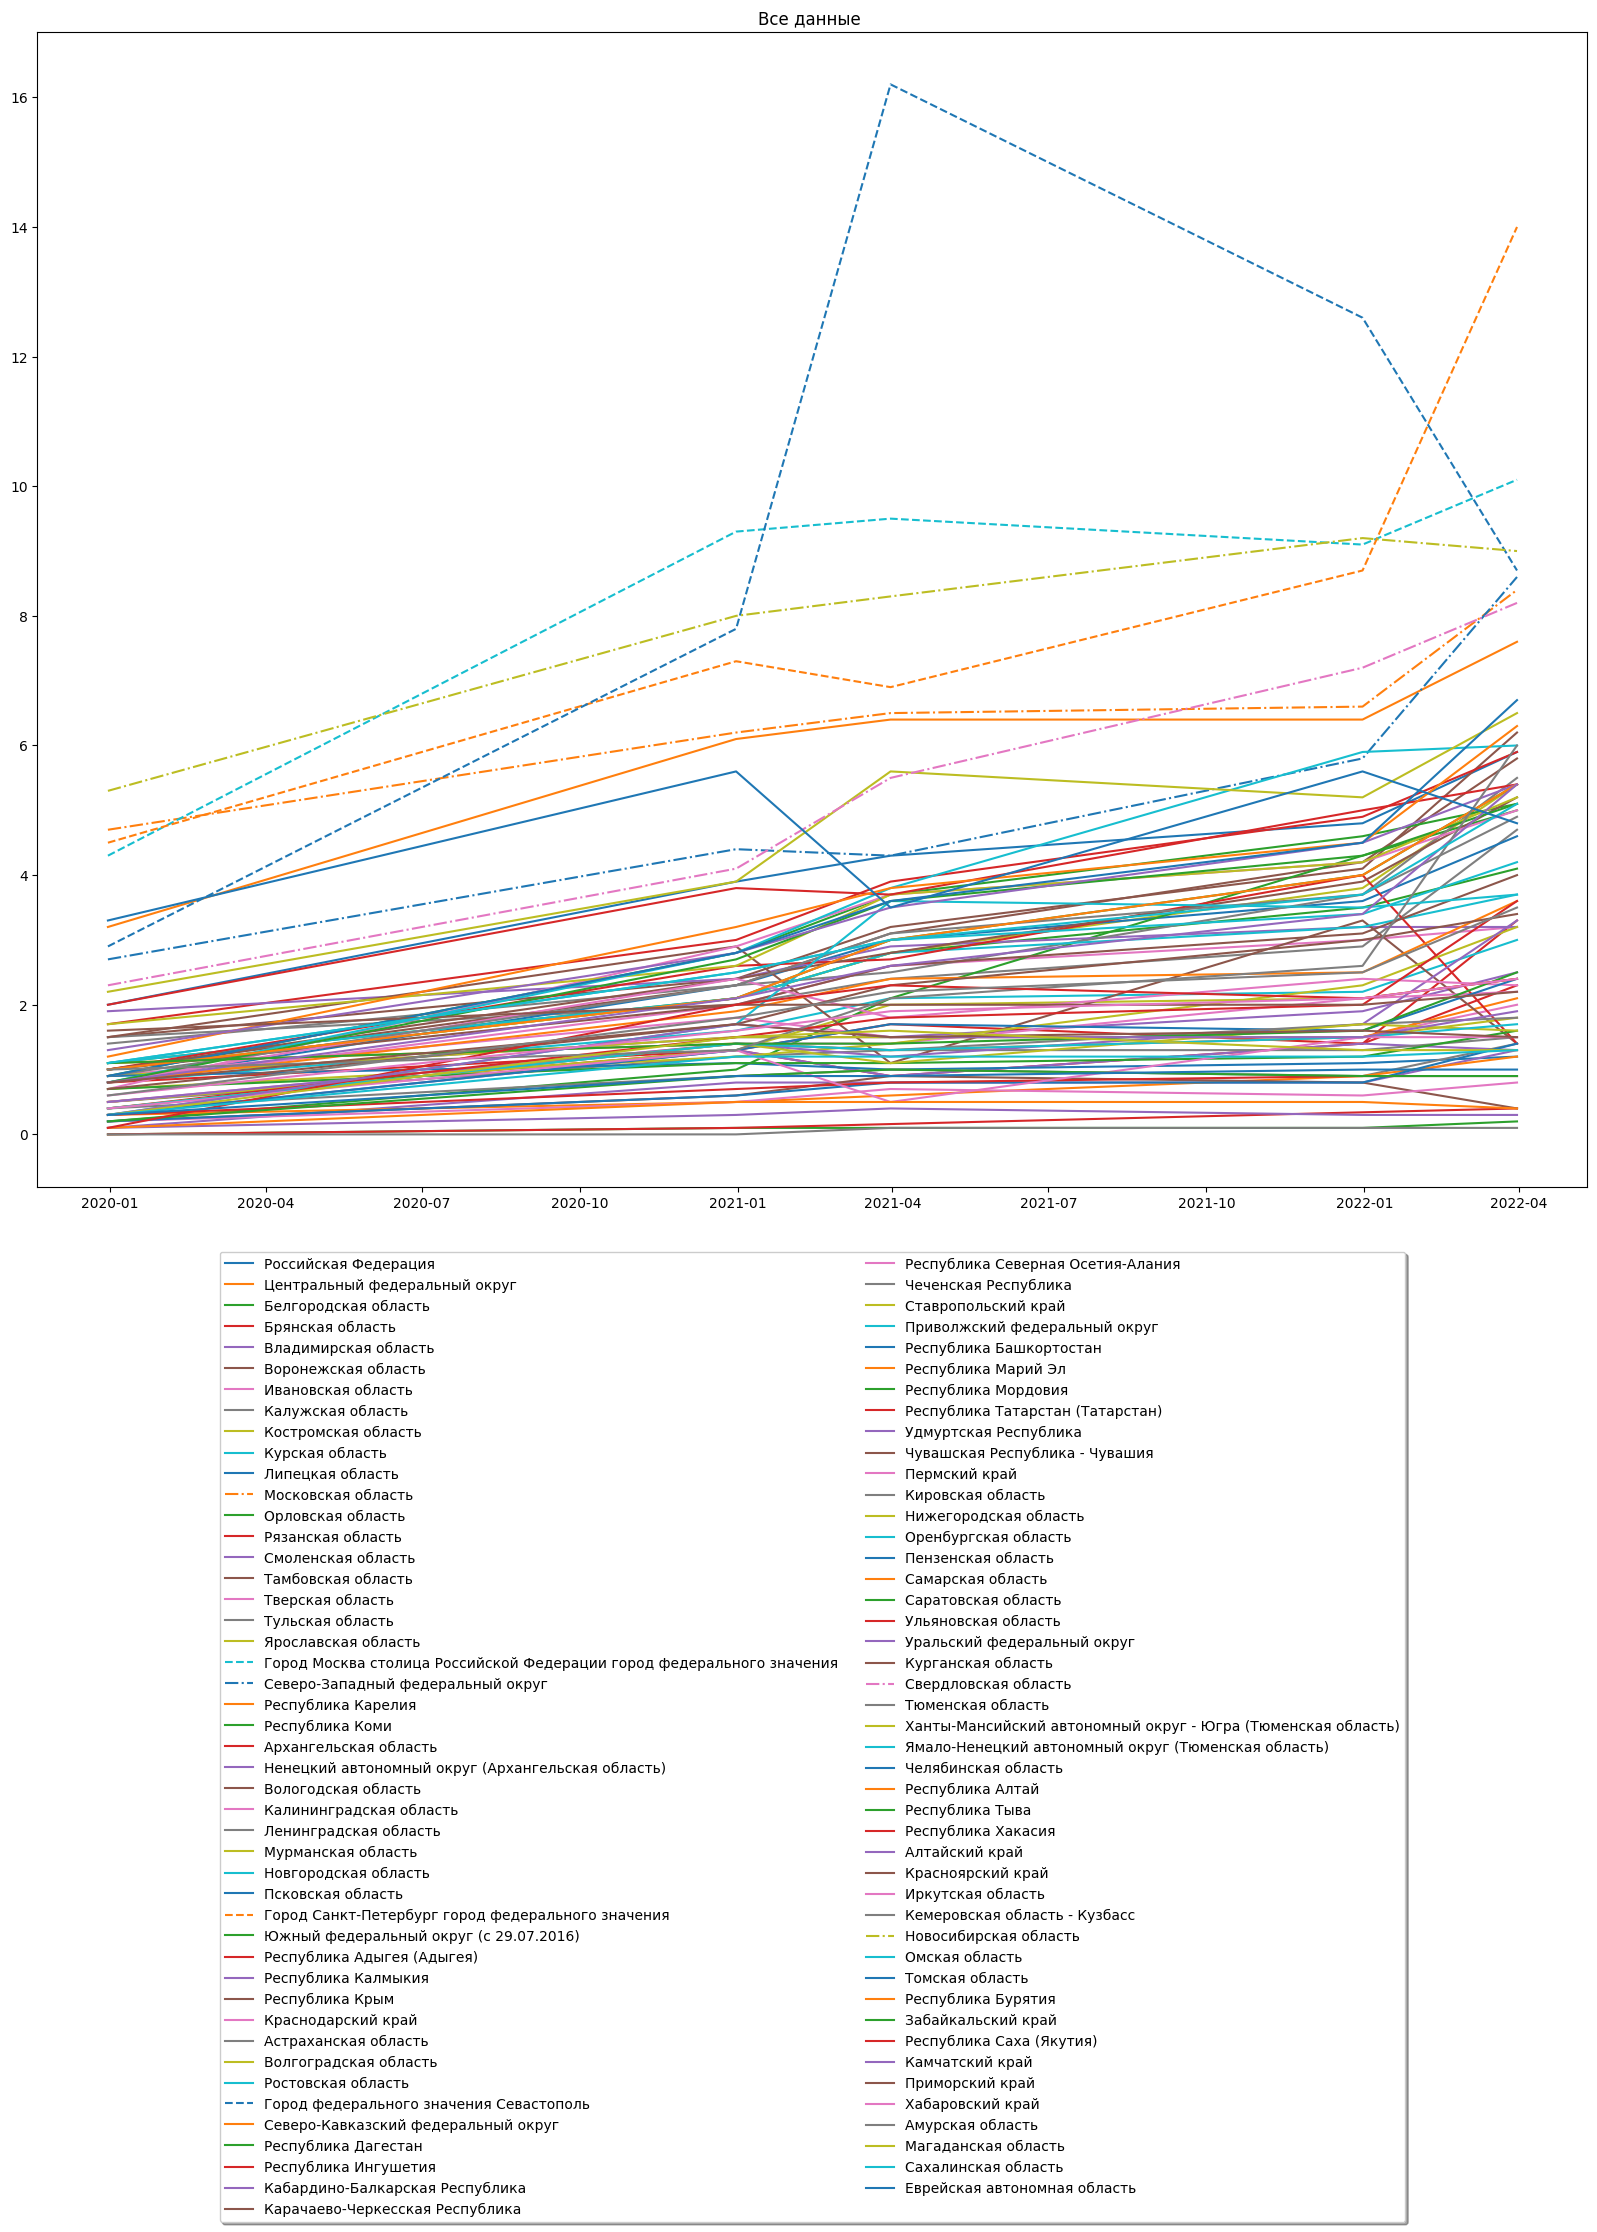

In [12]:
fig, ax = plt.subplots(figsize=(20,15))
plt.title('Все данные ')

for index, okatorow in dfokato.iterrows():
    df_filter = df['Okato'].isin([okatorow['Okato']])
    filtered = df[df_filter]
    if not filtered['Proc'].empty:   
        max_number = max(filtered['Proc'])
        ls = "-"
        if(max_number >= 8):
            ls = "-."
        if(max_number >= 10):
            ls = "--"
        plt.plot(filtered['Date'], filtered['Proc'], label=okatorow['Name'], ls=ls)                                
        
    else:
        print("Пустая последовательность " , okatorow['Name']) 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
plt.show()

In [13]:
df_filter = df['Okato'].isin(['67000000000'])
filtered = df[df_filter]
filtered

Num  Time        Okato          Period  Proc       Date
200  200  2019  67000000000  январь-декабрь   2.9 2019-12-31
201  201  2020  67000000000  январь-декабрь   7.8 2020-12-31
202  202  2021  67000000000     январь-март  16.2 2021-03-31
203  203  2021  67000000000  январь-декабрь  12.6 2021-12-31
204  204  2022  67000000000     январь-март   8.7 2022-03-31

In [14]:
df_ap = pd.read_csv("AirPollution_01012021/data.csv", delimiter=';') 
print(df_ap)


                   region                          mun_obr     oktmo  year  \
0          Алтайский край     Алейский муниципальный район  01601000  2019   
1          Алтайский край     Алейский муниципальный район  01601000  2020   
2          Алтайский край    Алтайский муниципальный район  01602000  2019   
3          Алтайский край    Алтайский муниципальный район  01602000  2020   
4          Алтайский край     Баевский муниципальный район  01603000  2019   
...                   ...                              ...       ...   ...   
4969  Ярославская область   Тутаевский муниципальный район  78643000  2020   
4970  Ярославская область    Угличский муниципальный район  78646000  2019   
4971  Ярославская область    Угличский муниципальный район  78646000  2020   
4972  Ярославская область  Ярославский муниципальный район  78650000  2019   
4973  Ярославская область  Ярославский муниципальный район  78650000  2020   

             F1ST       F1SIS      F1SIGAL       F1SSD       F1

In [15]:
print('Previous Datatypes\n', df_ap.dtypes, sep='')

Previous Datatypes
region       object
mun_obr      object
oktmo        object
year          int64
F1ST        float64
             ...   
F1BCME      float64
F1BNO2E     float64
F1BHE       float64
F1BVOCSE    float64
F1BOGALE    float64
Length: 77, dtype: object


In [16]:
df_ap_filter = df_ap['region'].isin(['Санкт-Петербург'])
df_ap_filtered = df_ap[df_ap_filter]
df_ap_filtered

region                 mun_obr     oktmo  year         F1ST  \
3720  Санкт-Петербург    Адмиралтейский район     40262  2019  8303.865000   
3721  Санкт-Петербург  Василеостровский район     40263  2019  4521.586000   
3722  Санкт-Петербург        Выборгский район     40265  2019  2158.053000   
3723  Санкт-Петербург       город Зеленогорск  40361000  2020    51.024000   
3724  Санкт-Петербург           город Колпино  40342000  2020  3200.185915   
...               ...                     ...       ...   ...          ...   
3842  Санкт-Петербург          поселок Шушары  40901000  2020  2197.503768   
3843  Санкт-Петербург        Приморский район     40270  2019  5782.634001   
3844  Санкт-Петербург        Пушкинский район     40294  2019  1982.248000   
3845  Санкт-Петербург       Фрунзенский район     40296  2019   699.173000   
3846  Санкт-Петербург       Центральный район     40298  2019  3316.324060   

           F1SIS      F1SIGAL       F1SSD        F1SCM        F1SNO  ...  \
3720  178.958000  8124.907000  997.940000  4271.066000  2682.874000  ...   
3721   22.740000  4498.846000   14.375000  1653.871000  2745.726000  ...   
3722  189.146000  1968.907000   18.141000   775.078000   208.721000  ...   
3723   10.721000    40.303000    3.062000    22.409000     6.468000  ...   
3724  165.974698  3034.211136  121.582572  1459.870066  1146.561707  ...   
...          ...          ...         ...          ...          ...  ...   
3842   19.919555  2177.583541   17.835429   597.851919   272.879761  ...   
3843   95.072000  5687.562001   67.581000   703.110000  4554.871000  ...   
3844  146.089000  1836.159000   17.444000   792.453000   253.021000  ...   
3845  202.131000   497.042000   85.466000   226.715000   109.885000  ...   
3846  124.899040  3191.425020   32.430601  1956.220005   936.805405  ...   

      F1BOGALTFU        F1BTE       F1BSE      F1BGALE      F1BSDE  \
3720       0.249  8303.865000  178.958000  8124.907000  997.940000   
3721       0.000  4521.586000   22.740000  4498.846000   14.375000   
3722       0.000  2158.053000  189.146000  1968.907000   18.141000   
3723       0.000    51.024000   10.721000    40.303000    3.062000   
3724       0.000  3200.185915  165.974698  3034.211136  121.582572   
...          ...          ...         ...          ...         ...   
3842       0.010  2197.503768   19.919555  2177.583541   17.835429   
3843       0.000  5782.634001   95.072000  5687.562001   67.581000   
3844       0.015  1982.248000  146.089000  1836.159000   17.444000   
3845       0.000   699.173000  202.131000   497.042000   85.466000   
3846       0.000  3316.324060  124.899040  3191.425020   32.430601   

           F1BCME      F1BNO2E       F1BHE     F1BVOCSE   F1BOGALE  
3720  4271.066000  2682.874000   12.697000   152.338000   7.992000  
3721  1653.871000  2745.726000    2.888000    80.837000   1.149000  
3722   775.078000   208.721000  611.601000   319.787000  35.579000  
3723    22.409000     6.468000    4.628000     2.896000   0.840000  
3724  1459.870066  1146.561707   32.666000   266.602599   6.928192  
...           ...          ...         ...          ...        ...  
3842   597.851919   272.879761  107.126332  1102.045872  79.844228  
3843   703.110000  4554.871000  154.083001   187.873000  20.044000  
3844   792.453000   253.021000   58.013000   683.805000  31.423000  
3845   226.715000   109.885000    0.753000    68.281000   5.942000  
3846  1956.220005   936.805405    0.886000   261.672009   3.411000  

[127 rows x 77 columns]

<AxesSubplot: xlabel='mun_obr'>

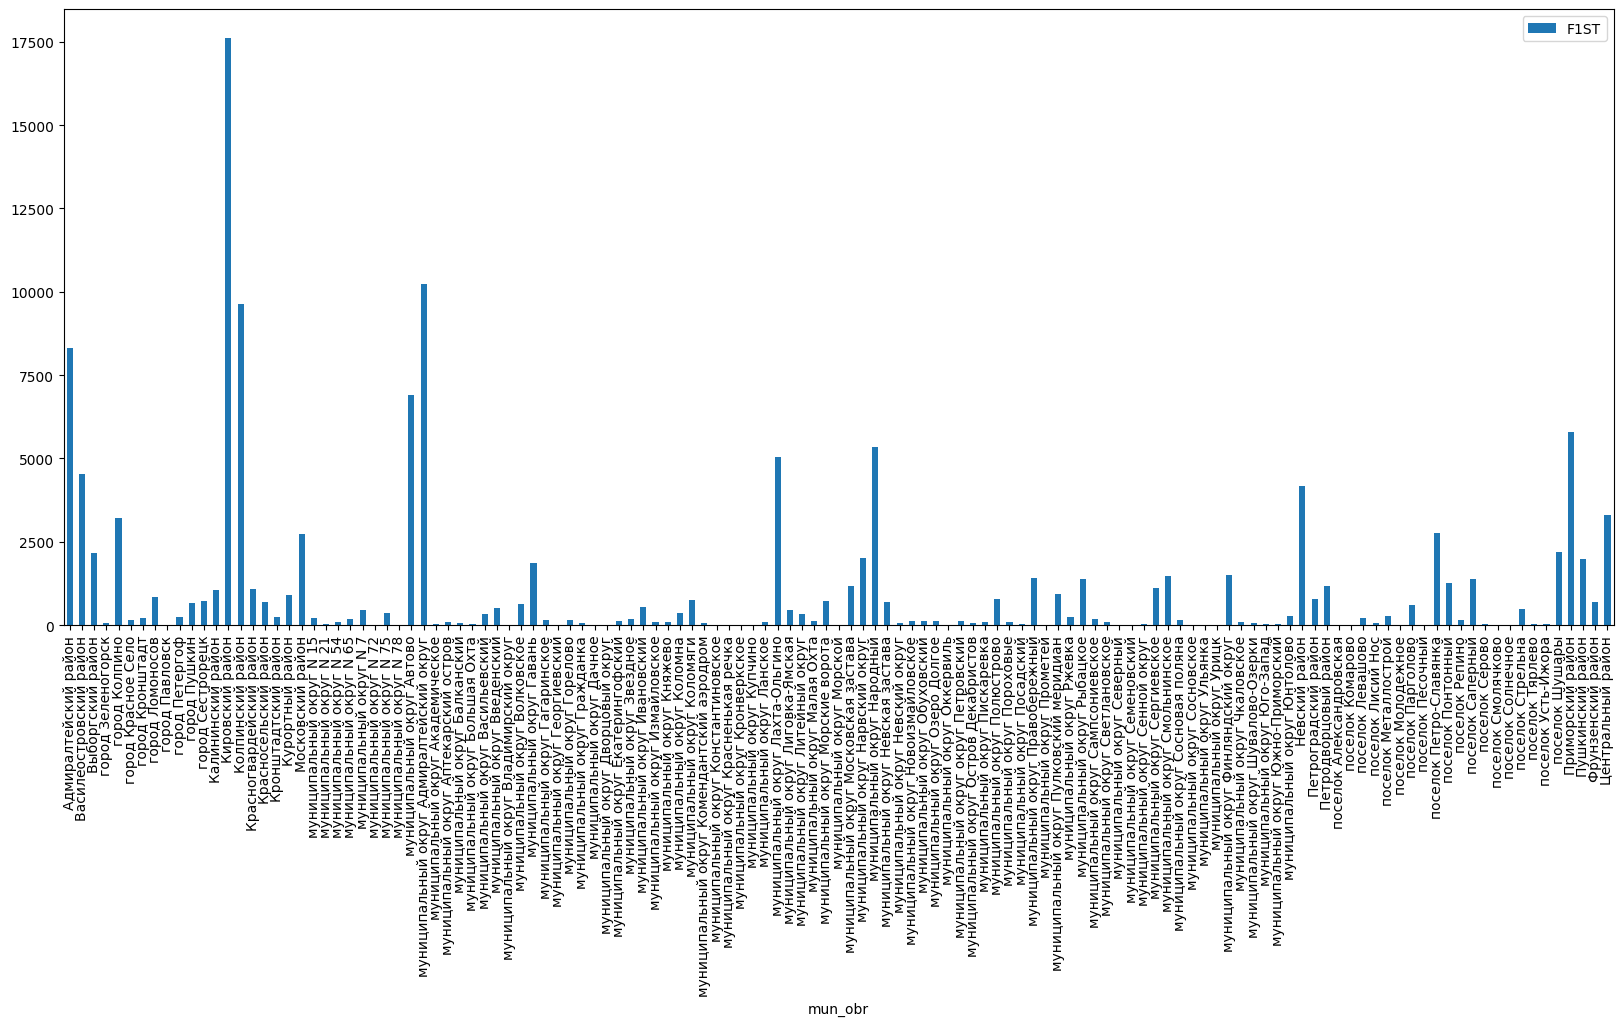

In [17]:
df_ap_filtered.plot(x="mun_obr", y="F1ST", kind="bar", figsize=(20,8))

<AxesSubplot: xlabel='mun_obr'>

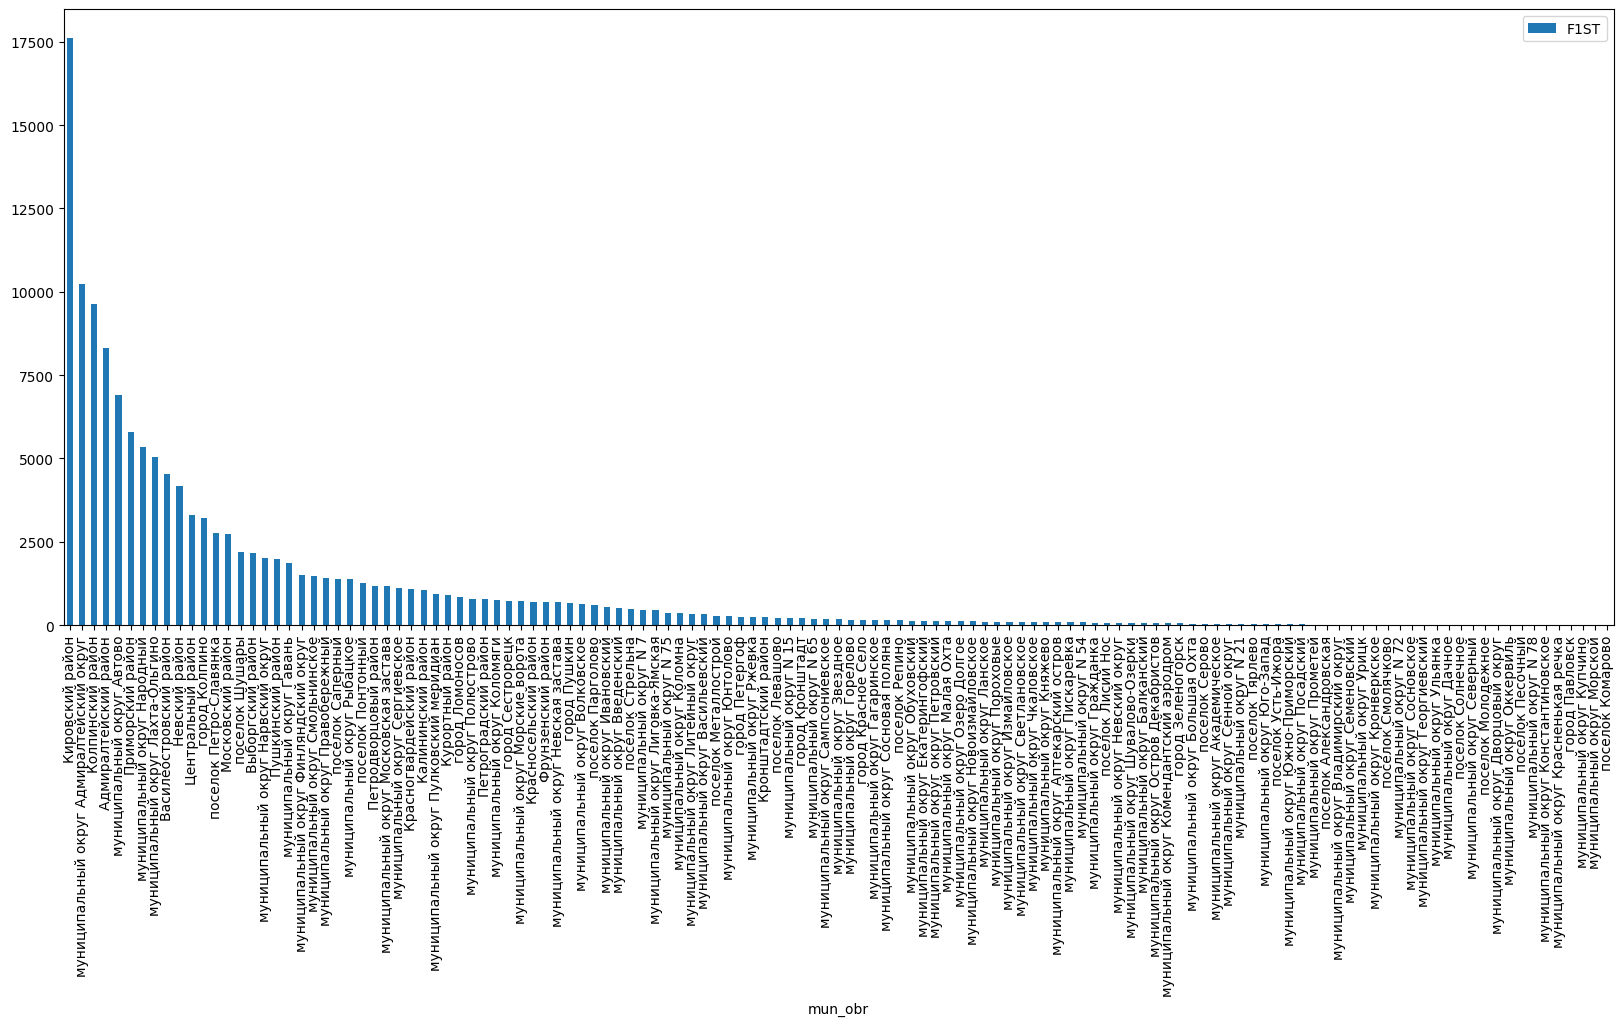

In [18]:
sorted_df = df_ap_filtered.sort_values(by='F1ST', ascending=False)

sorted_df.plot(x="mun_obr", y="F1ST", kind="bar", figsize=(20,8))

In [19]:
df_ap_filter = sorted_df['year'].isin([2019])
df_ap_2019 = sorted_df[df_ap_filter]

df_ap_filter = sorted_df['year'].isin([2020])
df_ap_2020 = sorted_df[df_ap_filter]


<AxesSubplot: xlabel='mun_obr'>

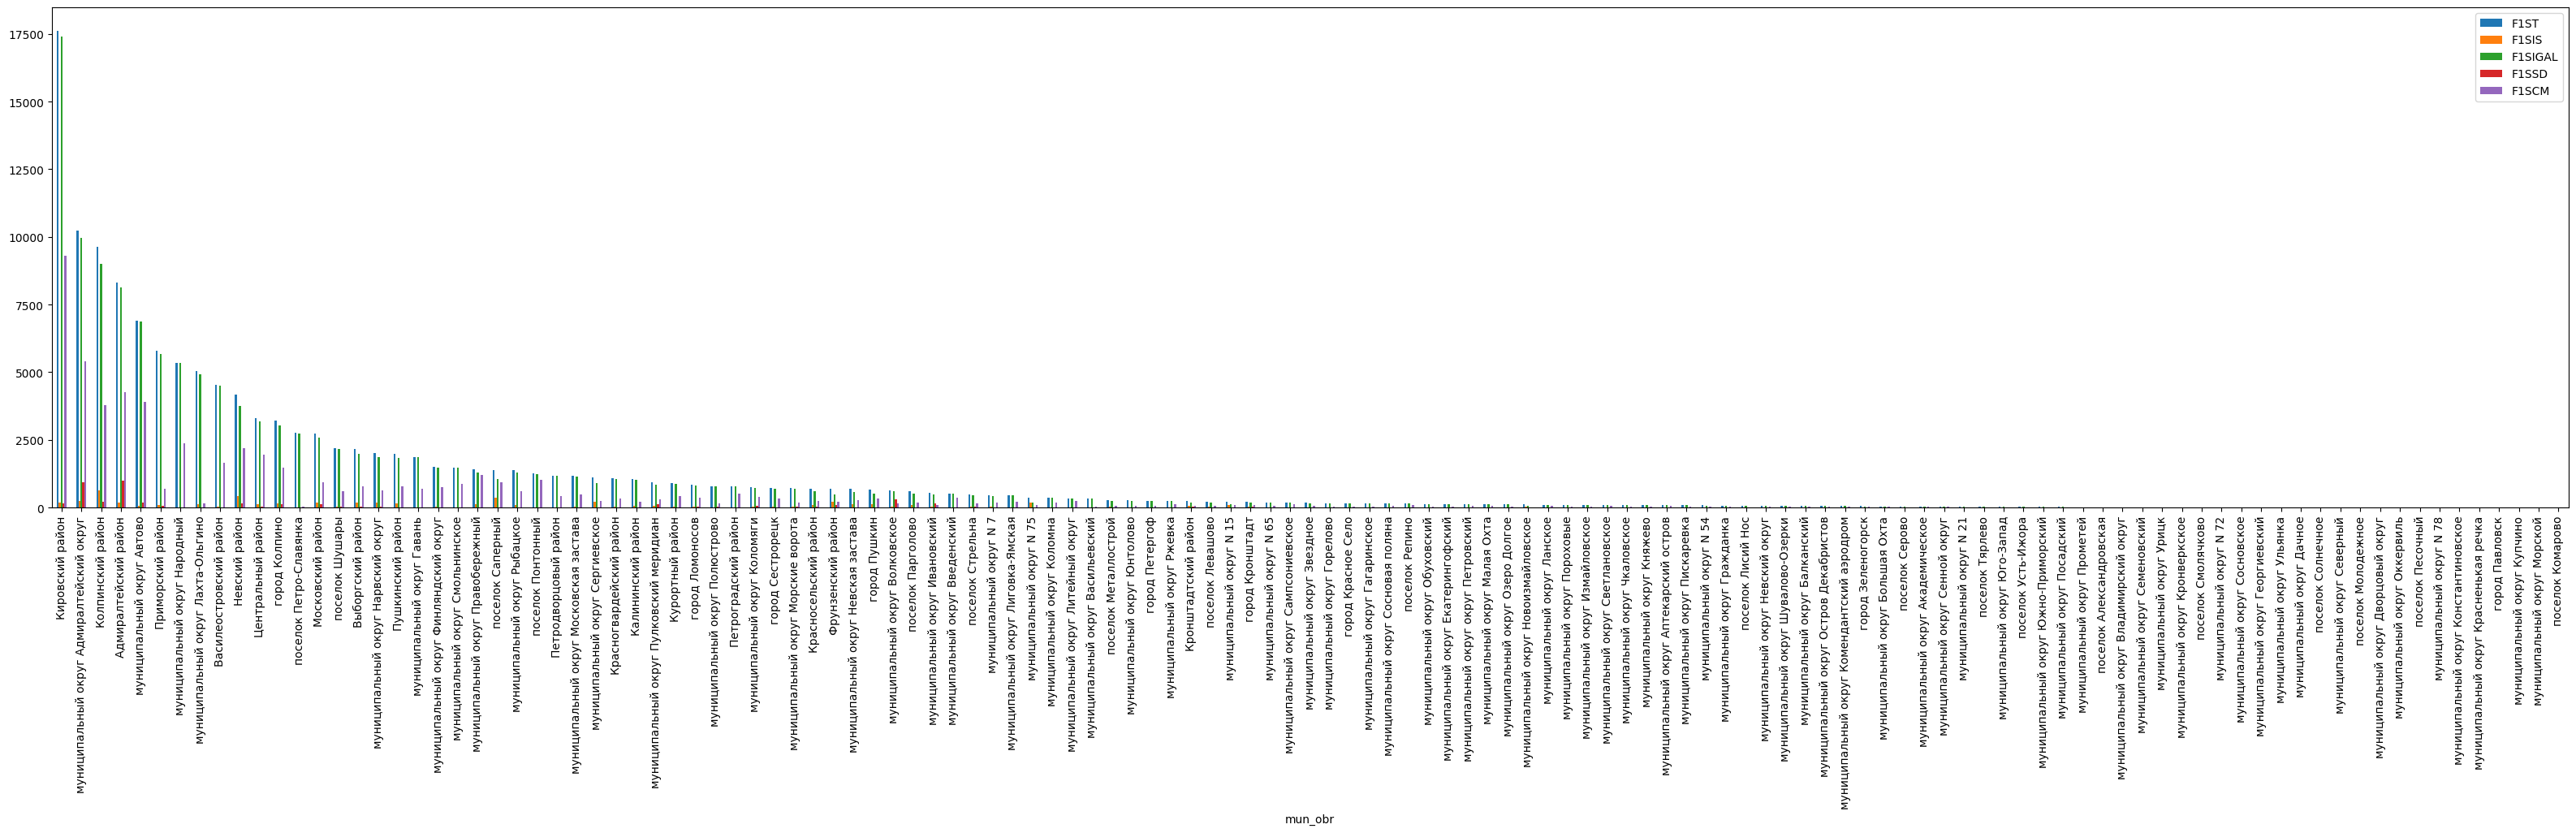

In [20]:
sorted_df.plot(x="mun_obr", y=["F1ST", "F1SIS", "F1SIGAL", "F1SSD", "F1SCM"], kind="bar", figsize=(40,8))

!!!!!!!!!!!!!!


In [21]:
df_avto_com = pd.read_excel('Avto-gruz_2021.xls', sheet_name='2010-2021 на коммерческой осн.', skiprows=[0,1,2,3,101,102] )
df_avto_com.rename(columns = {'Unnamed: 0' : 'Name'}, inplace = True)
df_avto_com.drop([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], axis=1, inplace=True)
df_avto_com

Name        2019          2020          2021
0            Российская Федерация  84430582.4  9.517401e+07  1.045929e+08
1   Центральный федеральный округ  23749590.3  2.980762e+07  3.104275e+07
2            Белгородская область   1674087.9  1.547062e+06  1.685685e+06
3                Брянская область    539131.1  4.647621e+05  4.467599e+05
4            Владимирская область    331239.9  4.576745e+05  9.195881e+05
..                            ...         ...           ...           ...
91               Амурская область     86625.2  7.958934e+04  8.953936e+04
92            Магаданская область    136818.5  1.161215e+05  3.590838e+05
93            Сахалинская область    104181.9  1.512920e+05  4.096758e+05
94   Еврейская автономная область       717.1  1.754994e+02  4.058269e+02
95     Чукотский автономный округ      3573.7  1.714916e+03  4.453420e+03

[96 rows x 4 columns]

In [22]:
print(list(df_avto_com)[1:])
years = list(df_avto_com)[1:]

[2019, 2020, 2021]


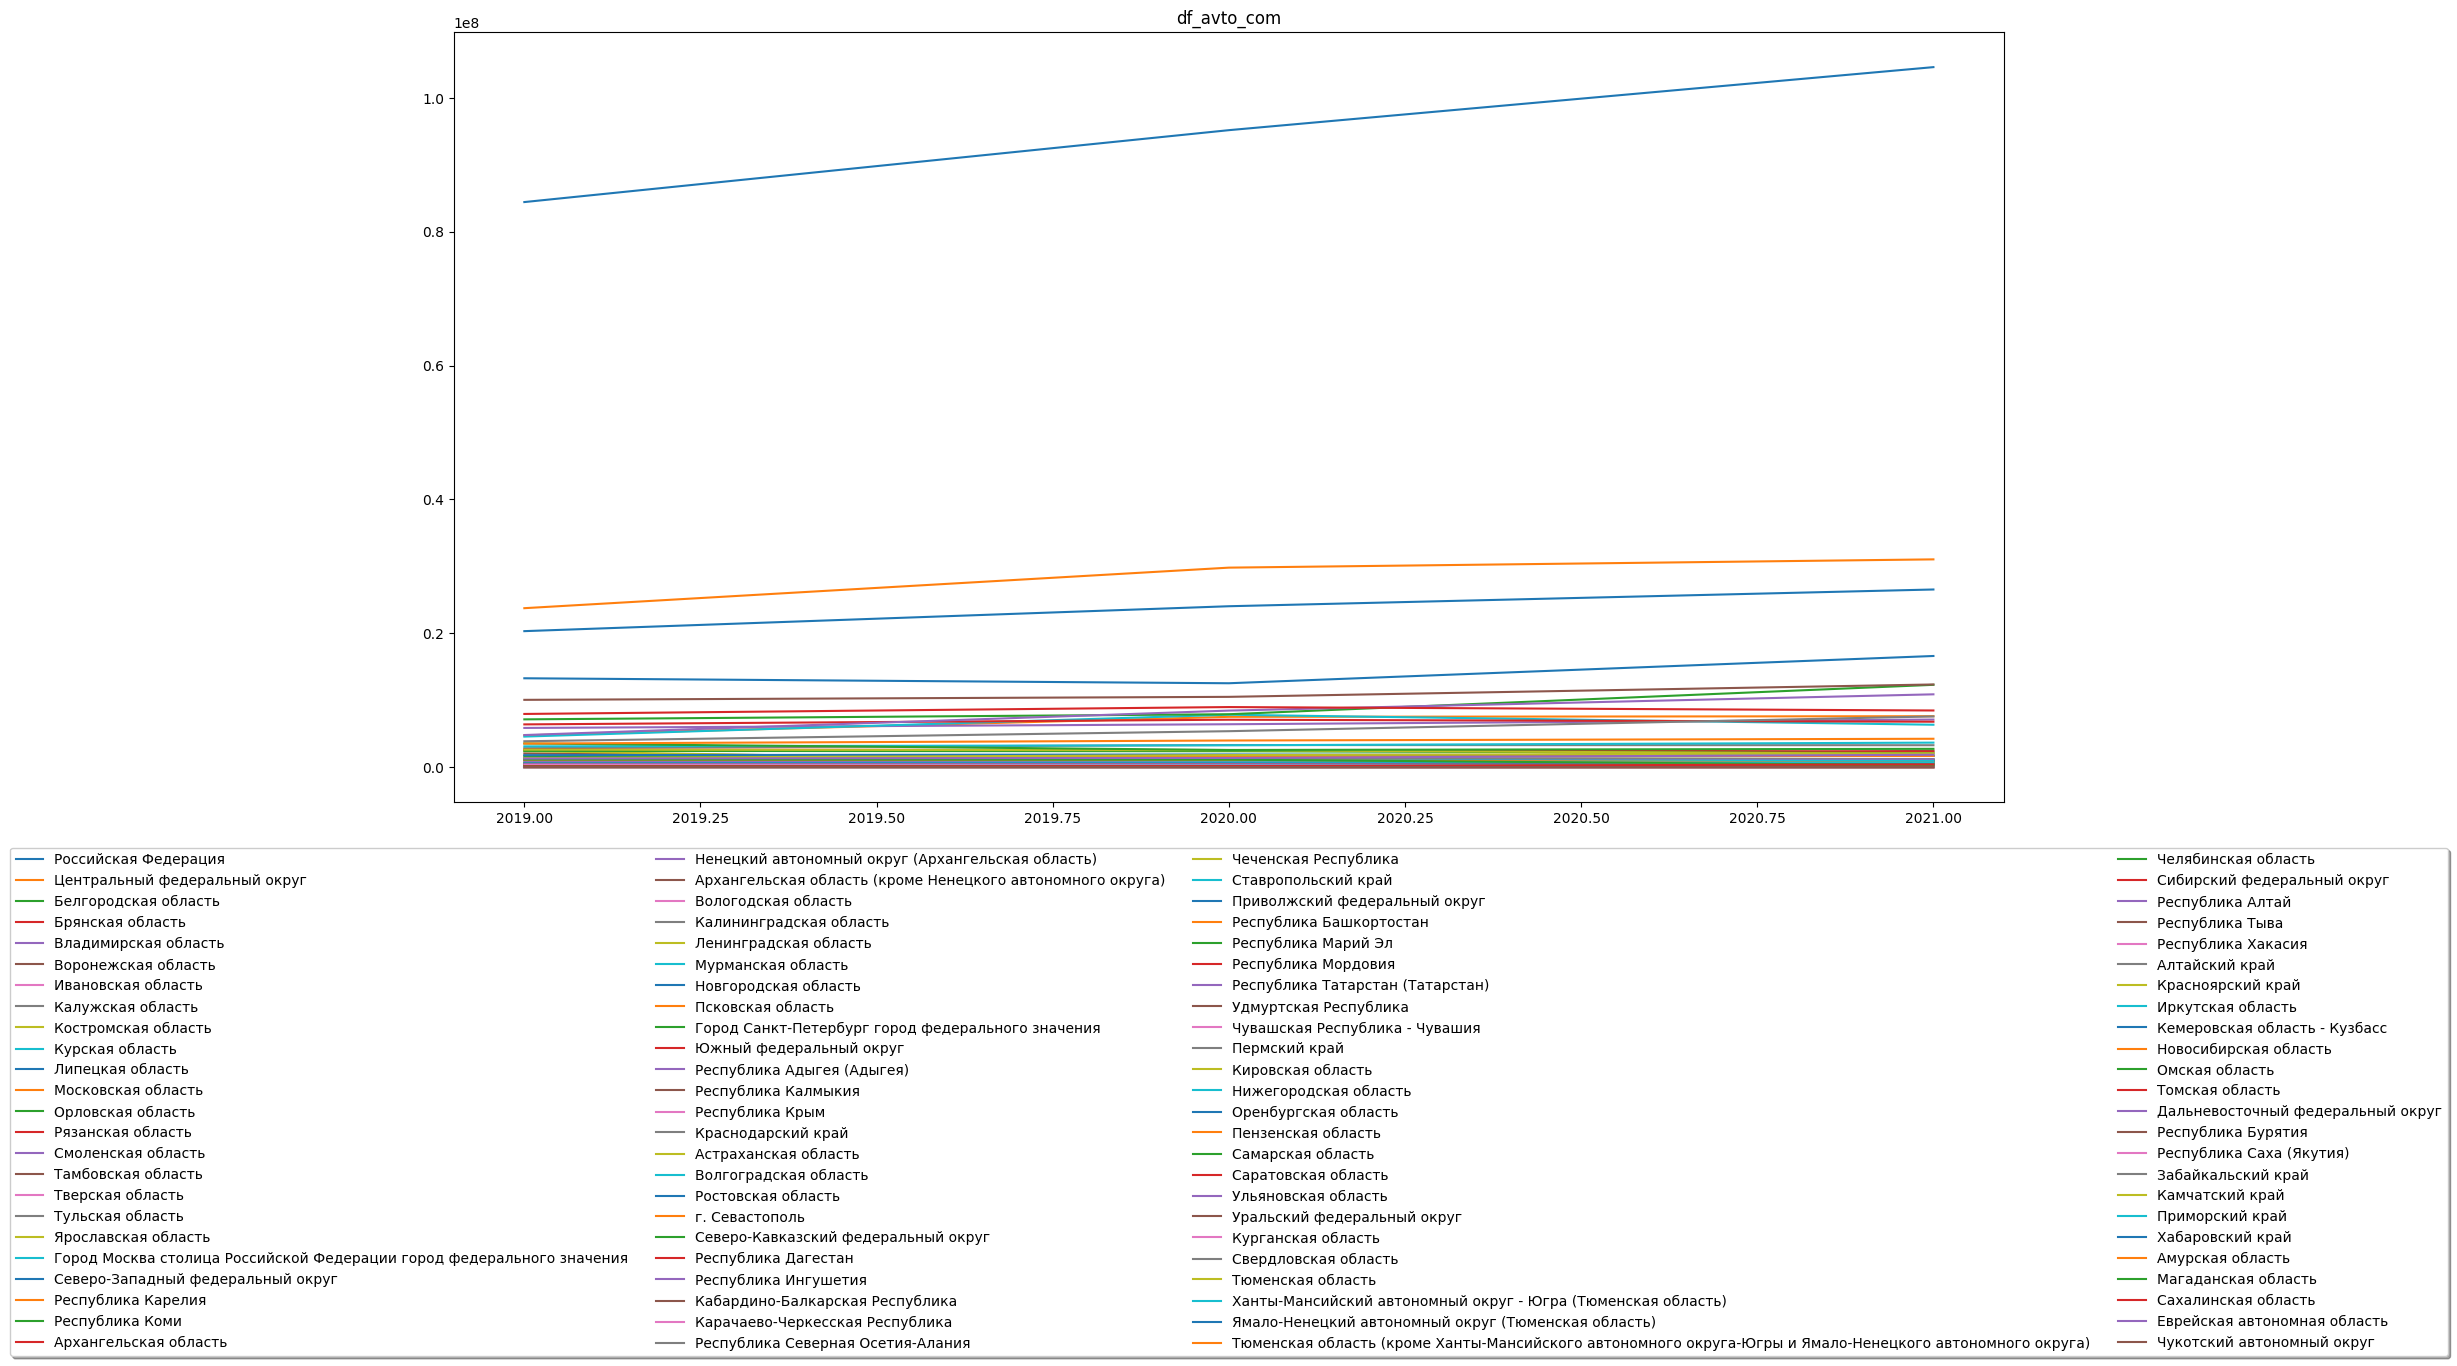

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('df_avto_com')
for index, avcomrow in df_avto_com.iterrows():
    plt.plot(years, avcomrow[1:], label=avcomrow['Name'])

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
plt.show()

In [24]:
cols2skip = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]  
cols = [i for i in range(23) if i not in cols2skip]
df_avto = pd.read_excel('Avto-gruz_2021.xls', sheet_name='2000-2020 всего', skiprows=[0,1,2,3,101,102], usecols=cols )
df_avto.rename(columns = {'Unnamed: 0' : 'Name'}, inplace = True)
df_avto

Name           2019           2020           2021
0            Российская Федерация  275427.000000  271822.000000  285333.000000
1   Центральный федеральный округ   50694.766627   51746.785398   59164.111908
2            Белгородская область    4229.319470    3884.406003    4099.152509
3                Брянская область    4511.110112    1395.868568    1385.627078
4            Владимирская область     942.312241    1035.117657    1504.407475
..                            ...            ...            ...            ...
91               Амурская область     627.048402     563.428490     609.190291
92            Магаданская область     333.858636     675.376446     665.740165
93            Сахалинская область     345.042537     594.374787     654.965437
94   Еврейская автономная область     125.093551     128.406294     114.286975
95     Чукотский автономный округ      22.615886      39.134979      15.862121

[96 rows x 4 columns]

In [25]:
print('Previous Datatypes\n', df_avto.dtypes, sep='')

Previous Datatypes
Name     object
2019    float64
2020    float64
2021    float64
dtype: object


[2019, 2020, 2021]


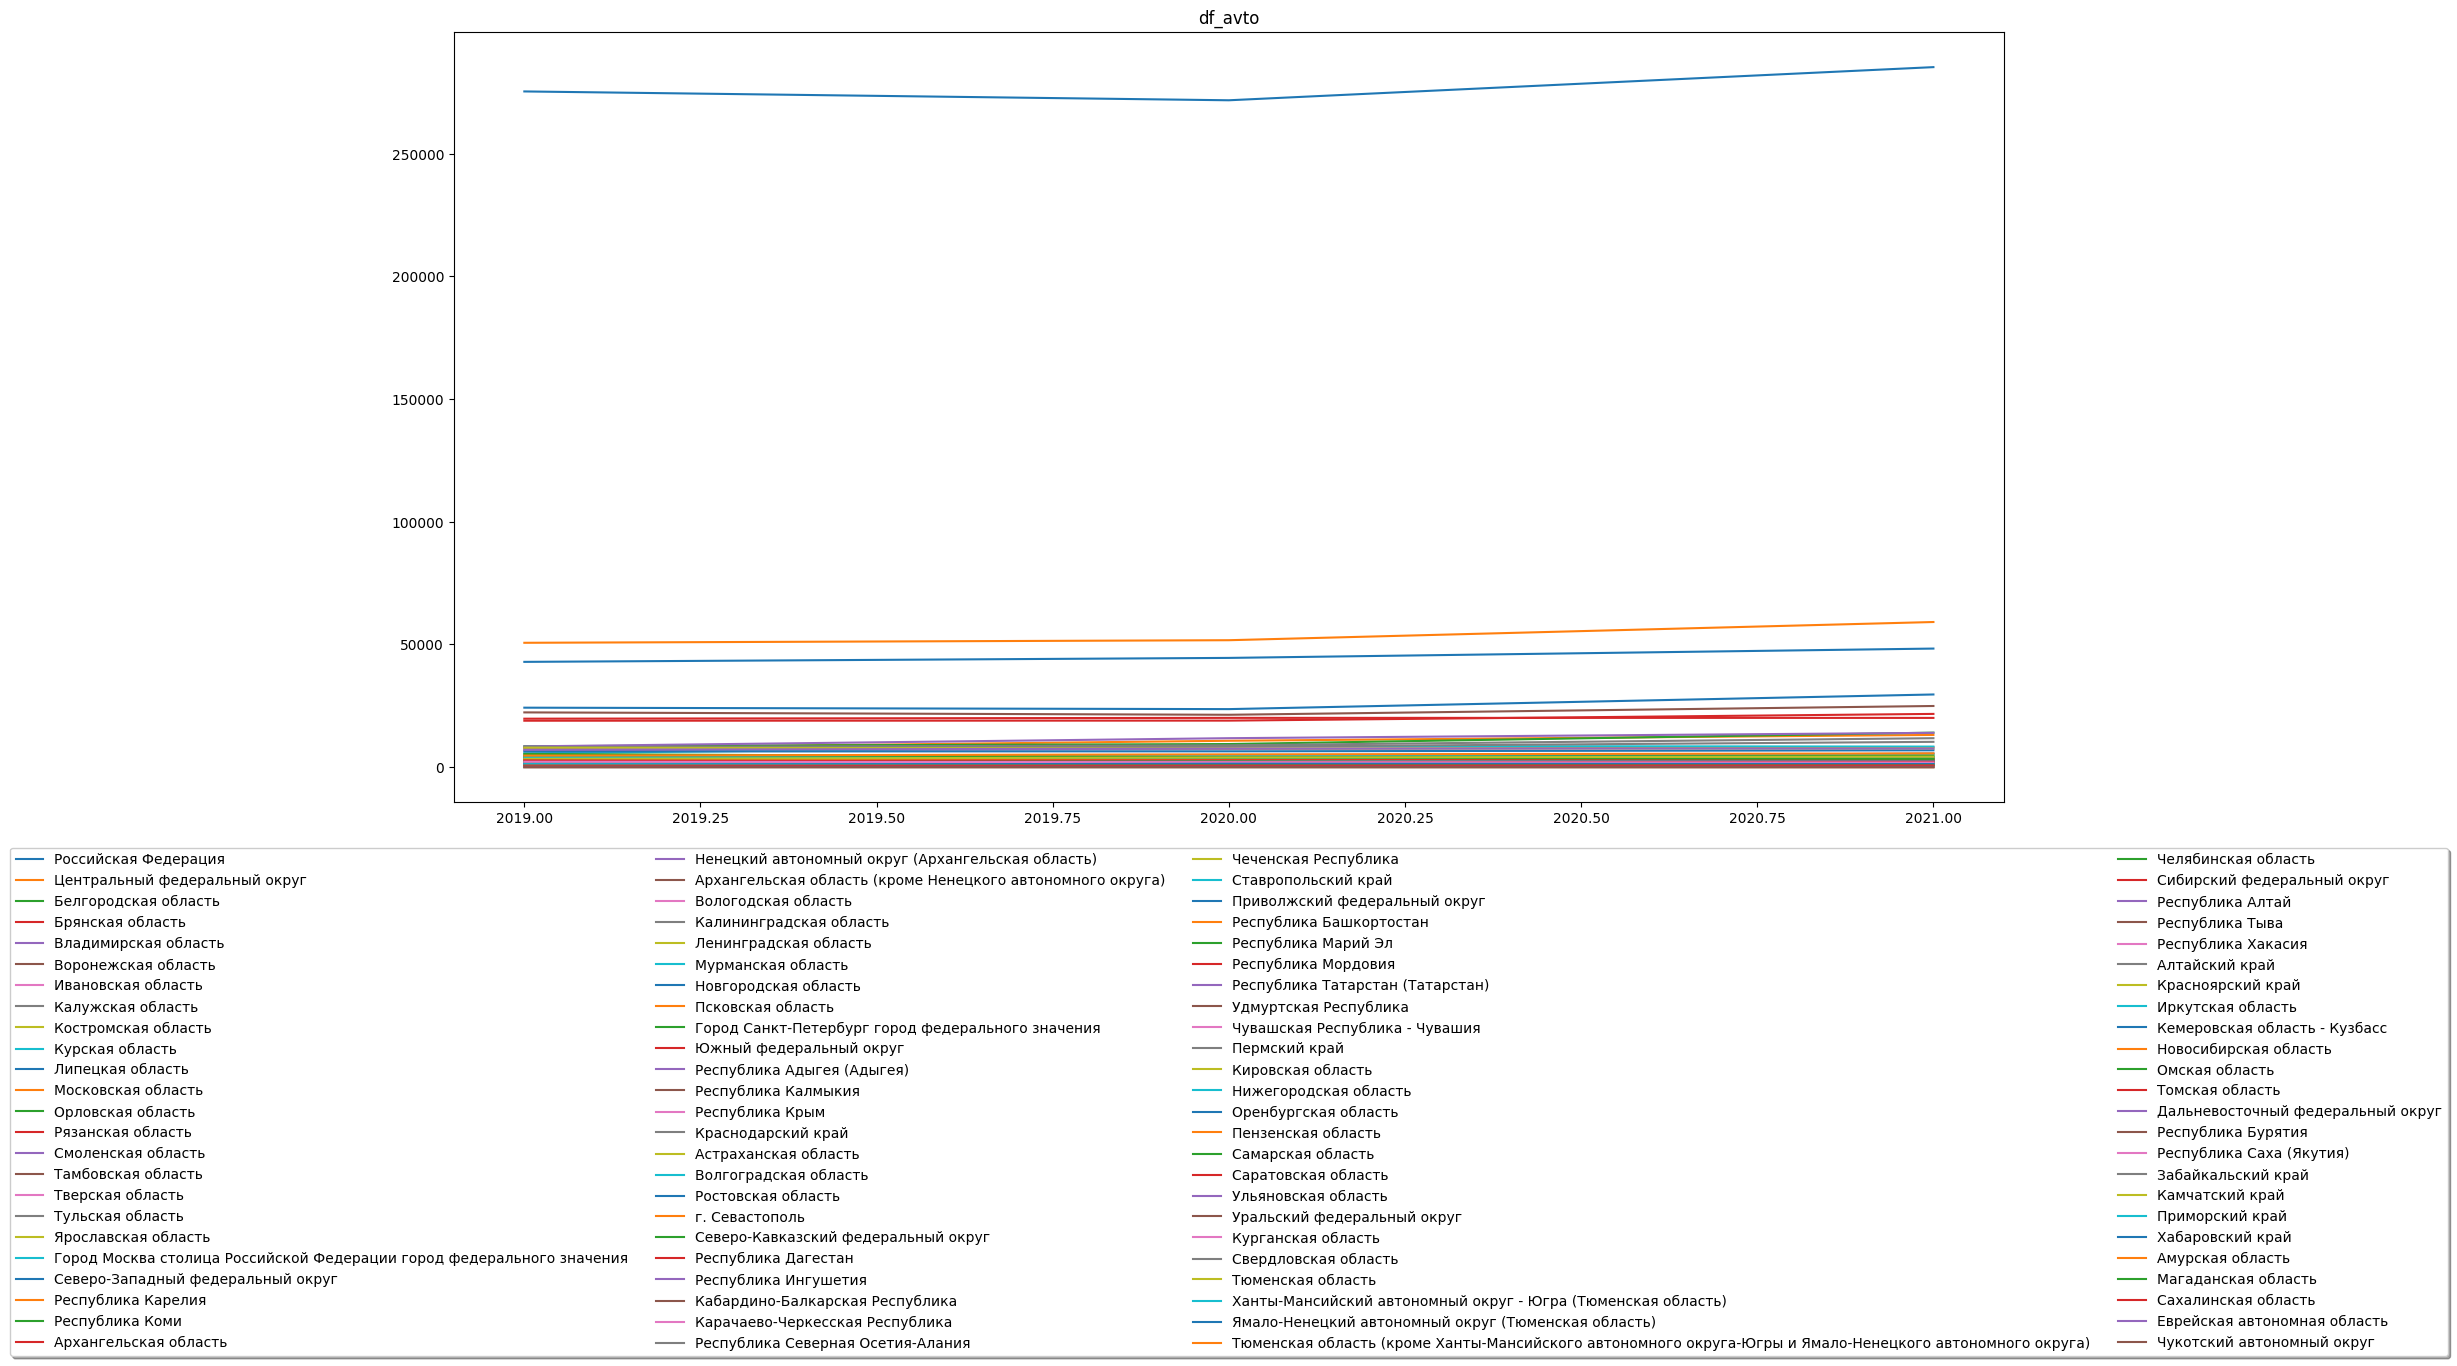

In [26]:
print(list(df_avto)[1:])
years2 = list(df_avto)[1:]

fig, ax = plt.subplots(figsize=(20,10))
plt.title('df_avto')
for index, row in df_avto.iterrows():
    plt.plot(years2, row[1:], label=row['Name'])

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
plt.show()

https://www.codecamp.ru/blog/kak-rasschitat-vzaimnuiu-korrieliatsiiu-v-python/

https://habr.com/ru/post/468295/


In [27]:
df= df[df.Period == "январь-декабрь"] 
df

Num  Time        Okato          Period  Proc       Date
0      0  2019          643  январь-декабрь   2.0 2019-12-31
1      1  2020          643  январь-декабрь   3.9 2020-12-31
3      3  2021          643  январь-декабрь   4.8 2021-12-31
5      5  2019          030  январь-декабрь   3.2 2019-12-31
6      6  2020          030  январь-декабрь   6.1 2020-12-31
..   ...   ...          ...             ...   ...        ...
444  444  2020  64000000000  январь-декабрь   1.2 2020-12-31
446  446  2021  64000000000  январь-декабрь   1.2 2021-12-31
448  448  2019  99000000000  январь-декабрь   0.3 2019-12-31
449  449  2020  99000000000  январь-декабрь   0.9 2020-12-31
451  451  2021  99000000000  январь-декабрь   1.0 2021-12-31

[272 rows x 6 columns]

In [28]:
belg = df[df.Okato == "643"] 
#belg = belg.set_index('Time')
print(belg)

dfA = df_avto.loc[2][1:]
print(dfA)
dfAC = df_avto_com.loc[2][1:]
print(dfAC)
#belg["dfAC"] = belg['Time'].map(dfAC)

belg["dfA"] = dfA.values
belg["dfAC"] = dfAC.values
print(belg)
belg.drop(['Time', 'Okato','Num','Period', 'Date'], axis=1, inplace=True)

print(belg)




#calculate cross correlation
result1 =  sm.tsa.stattools.ccf(belg.Proc, belg.dfA, adjusted=False)
print(result1)
result2 =  sm.tsa.stattools.ccf(belg.Proc, belg.dfAC, adjusted=False)
print(result2)
result3 =  sm.tsa.stattools.ccf(belg.dfA, belg.dfAC, adjusted=False)
print(result3)

   Num  Time Okato          Period  Proc       Date
0    0  2019   643  январь-декабрь   2.0 2019-12-31
1    1  2020   643  январь-декабрь   3.9 2020-12-31
3    3  2021   643  январь-декабрь   4.8 2021-12-31
2019     4229.31947
2020    3884.406003
2021    4099.152509
Name: 2, dtype: object
2019       1674087.9
2020    1547061.7418
2021    1685685.3949
Name: 2, dtype: object
   Num  Time Okato          Period  Proc       Date          dfA          dfAC
0    0  2019   643  январь-декабрь   2.0 2019-12-31   4229.31947     1674087.9
1    1  2020   643  январь-декабрь   3.9 2020-12-31  3884.406003  1547061.7418
3    3  2021   643  январь-декабрь   4.8 2021-12-31  4099.152509  1685685.3949
   Proc          dfA          dfAC
0   2.0   4229.31947     1674087.9
1   3.9  3884.406003  1547061.7418
3   4.8  4099.152509  1685685.3949
[-0.55328481 -0.35604836  0.39222664]
[-0.12752573 -0.43838755  0.21583224]
[ 0.89674904 -0.36111551  0.04049113]


C:\Users\tvi\AppData\Local\Temp\ipykernel_8176\1819001468.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  belg["dfA"] = dfA.values
C:\Users\tvi\AppData\Local\Temp\ipykernel_8176\1819001468.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  belg["dfAC"] = dfAC.values
C:\Users\tvi\AppData\Local\Temp\ipykernel_8176\1819001468.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [29]:
belg.dfAC = belg.dfAC.astype(float)
belg.dfA = belg.dfA.astype(float)
print(belg)
print('Previous Datatypes\n', belg.dtypes, sep='')
print(belg.corr())

   Proc          dfA          dfAC
0   2.0  4229.319470  1.674088e+06
1   3.9  3884.406003  1.547062e+06
3   4.8  4099.152509  1.685685e+06
Previous Datatypes
Proc    float64
dfA     float64
dfAC    float64
dtype: object
          Proc       dfA      dfAC
Proc  1.000000 -0.553285 -0.127526
dfA  -0.553285  1.000000  0.896749
dfAC -0.127526  0.896749  1.000000


C:\Users\tvi\AppData\Local\Temp\ipykernel_8176\2637302013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  belg.dfAC = belg.dfAC.astype(float)
C:\Users\tvi\AppData\Local\Temp\ipykernel_8176\2637302013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  belg.dfA = belg.dfA.astype(float)


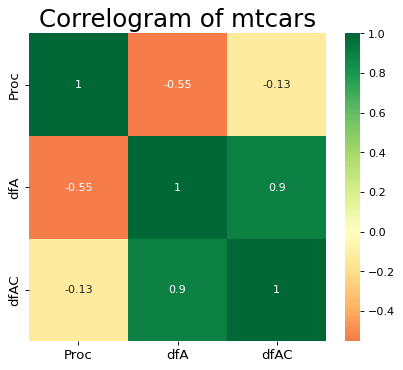

In [30]:

# Plot
plt.figure(figsize=(6,5), dpi= 80)
sns.heatmap(belg.corr(), xticklabels=belg.corr().columns, yticklabels=belg.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [31]:
dfokato
print('Previous Datatypes\n', df_avto.dtypes, sep='')
print('Previous Datatypes\n', df_avto_com.dtypes, sep='')


Previous Datatypes
Name     object
2019    float64
2020    float64
2021    float64
dtype: object
Previous Datatypes
Name     object
2019    float64
2020    float64
2021    float64
dtype: object


In [163]:
dict = {}

cols = ['Loc', 'Am_cor', 'Am_com_cor', 'Proc_mean'] 
lst = []

cols_all_data = ['Proc', 'Auto', 'Auto_Com']
lst_all_data = []

def set_all_data(dfiter):
    for index, row in dfiter.iterrows():    
        lst_all_data.append([row.Proc, row.Auto, row.Auto_Com])


for index, okatorow in dfokato.iterrows():
    
    df_filter_av = df_avto.Name.isin([okatorow.Name])
    filtered_av = df_avto[df_filter_av]

    df_filter_av_com = df_avto_com.Name.isin([okatorow.Name])
    filtered_av_com = df_avto_com[df_filter_av_com]

    if filtered_av.Name.empty or filtered_av_com.Name.empty: 
        #print(" ------------------ " + okatorow.Name)
        continue
    else:
        proc_df = df[df.Okato == okatorow.Okato] 
        #print(proc_df)
        if(len(proc_df.index) != 3):
            #print(okatorow.Name)
            #print(proc_df)
            continue
        
        #df["columnname"].mean()
        proc_mean = proc_df.Proc.mean()
        #print(okatorow.Name)
        dfA = filtered_av.iloc[0, 1:]
        #print(dfA)
        dfAC = filtered_av_com.iloc[0, 1:]
        #print(dfAC)

        proc_df["Auto"] = dfA.values
        proc_df["Auto_Com"] = dfAC.values
        
        proc_df.drop(['Time', 'Okato','Num','Period', 'Date'], axis=1, inplace=True)

        #print(proc_df)
        proc_df.Auto = proc_df.Auto.astype(float)
        proc_df.Auto_Com = proc_df.Auto_Com.astype(float)
        #print('Previous Datatypes\n', proc_df.dtypes, sep='')
        corr_df = proc_df.corr(method ='pearson') # kendall
        #print(corr_df)
        dict[okatorow.Name] = corr_df
        #print(corr_df.iat[0, 1])
        #print(corr_df.iat[0, 2])
        lst.append([okatorow.Name, corr_df.iat[0, 1], corr_df.iat[0, 2], proc_mean])

        set_all_data(proc_df)


df_all_data = pd.DataFrame(lst_all_data, columns=cols_all_data)
print(df_all_data)
df_cor = pd.DataFrame(lst, columns=cols)
df_cor

     Proc           Auto      Auto_Com
0     2.0  275427.000000  8.443058e+07
1     3.9  271822.000000  9.517401e+07
2     4.8  285333.000000  1.045929e+08
3     3.2   50694.766627  2.374959e+07
4     6.1   51746.785398  2.980762e+07
..    ...            ...           ...
259   1.2     594.374787  1.512920e+05
260   1.2     654.965437  4.096758e+05
261   0.3     125.093551  7.171000e+02
262   0.9     128.406294  1.754994e+02
263   1.0     114.286975  4.058269e+02

[264 rows x 3 columns]


Loc    Am_cor  Am_com_cor  Proc_mean
0            Российская Федерация  0.550755    0.986347   3.566667
1   Центральный федеральный округ  0.661468    0.997270   5.233333
2            Белгородская область -0.308660    0.144140   2.200000
3                Брянская область -0.995134   -0.996530   1.066667
4            Владимирская область  0.885163    0.907714   1.433333
..                            ...       ...         ...        ...
83               Хабаровский край  0.840784    0.683901   1.433333
84               Амурская область -0.413566    0.137627   1.633333
85            Магаданская область  0.991380    0.286449   1.033333
86            Сахалинская область  0.982845    0.618874   0.900000
87   Еврейская автономная область -0.416688   -0.841913   0.733333

[88 rows x 4 columns]

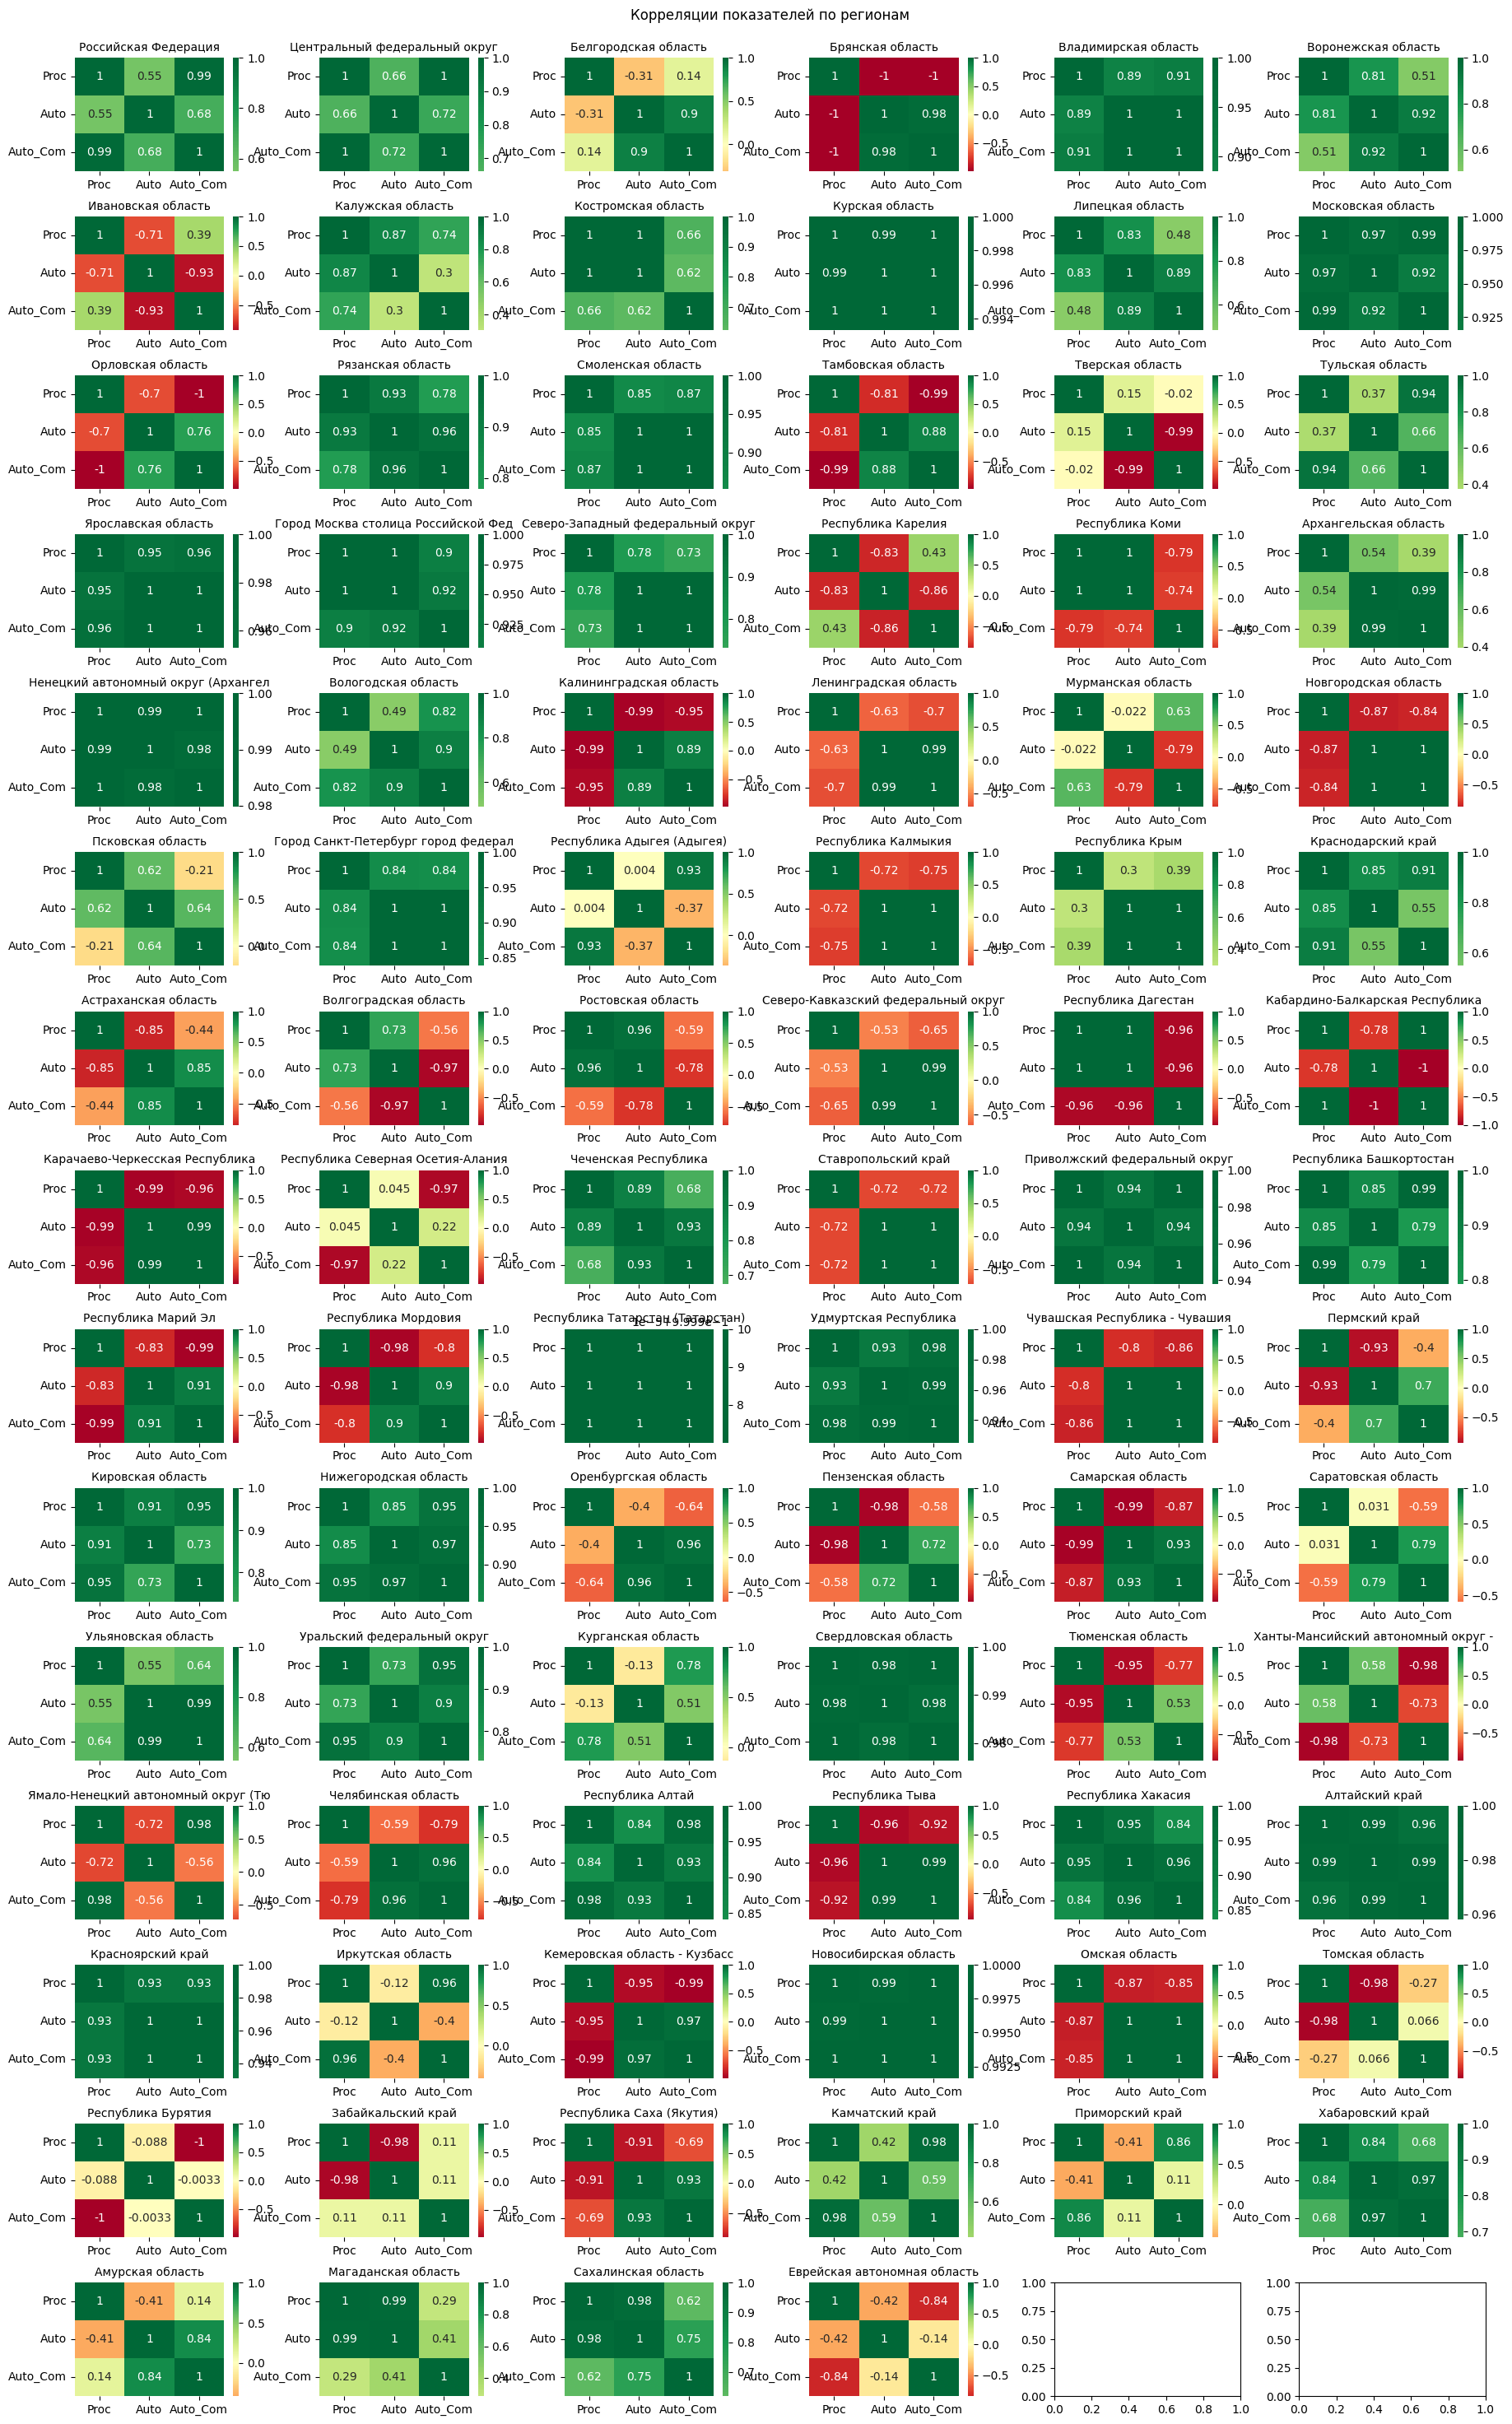

In [108]:
n = len(dict)
c = 6
r = (n // c) + 1

fig, axes = plt.subplots(r, c, figsize=(c * 3, r * 2))
fig.tight_layout (h_pad= 2)
ax = axes.ravel()
i = 0
for key, val in dict.items():
    plt.sca(ax[i])
    sns.heatmap(val, xticklabels=val.columns, yticklabels=val.columns, cmap='RdYlGn', center=0, annot=True)
    plt.title(key[:35], fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    i = i + 1

fig.suptitle('Корреляции показателей по регионам')
plt.subplots_adjust(top= 0.96 )
plt.show()

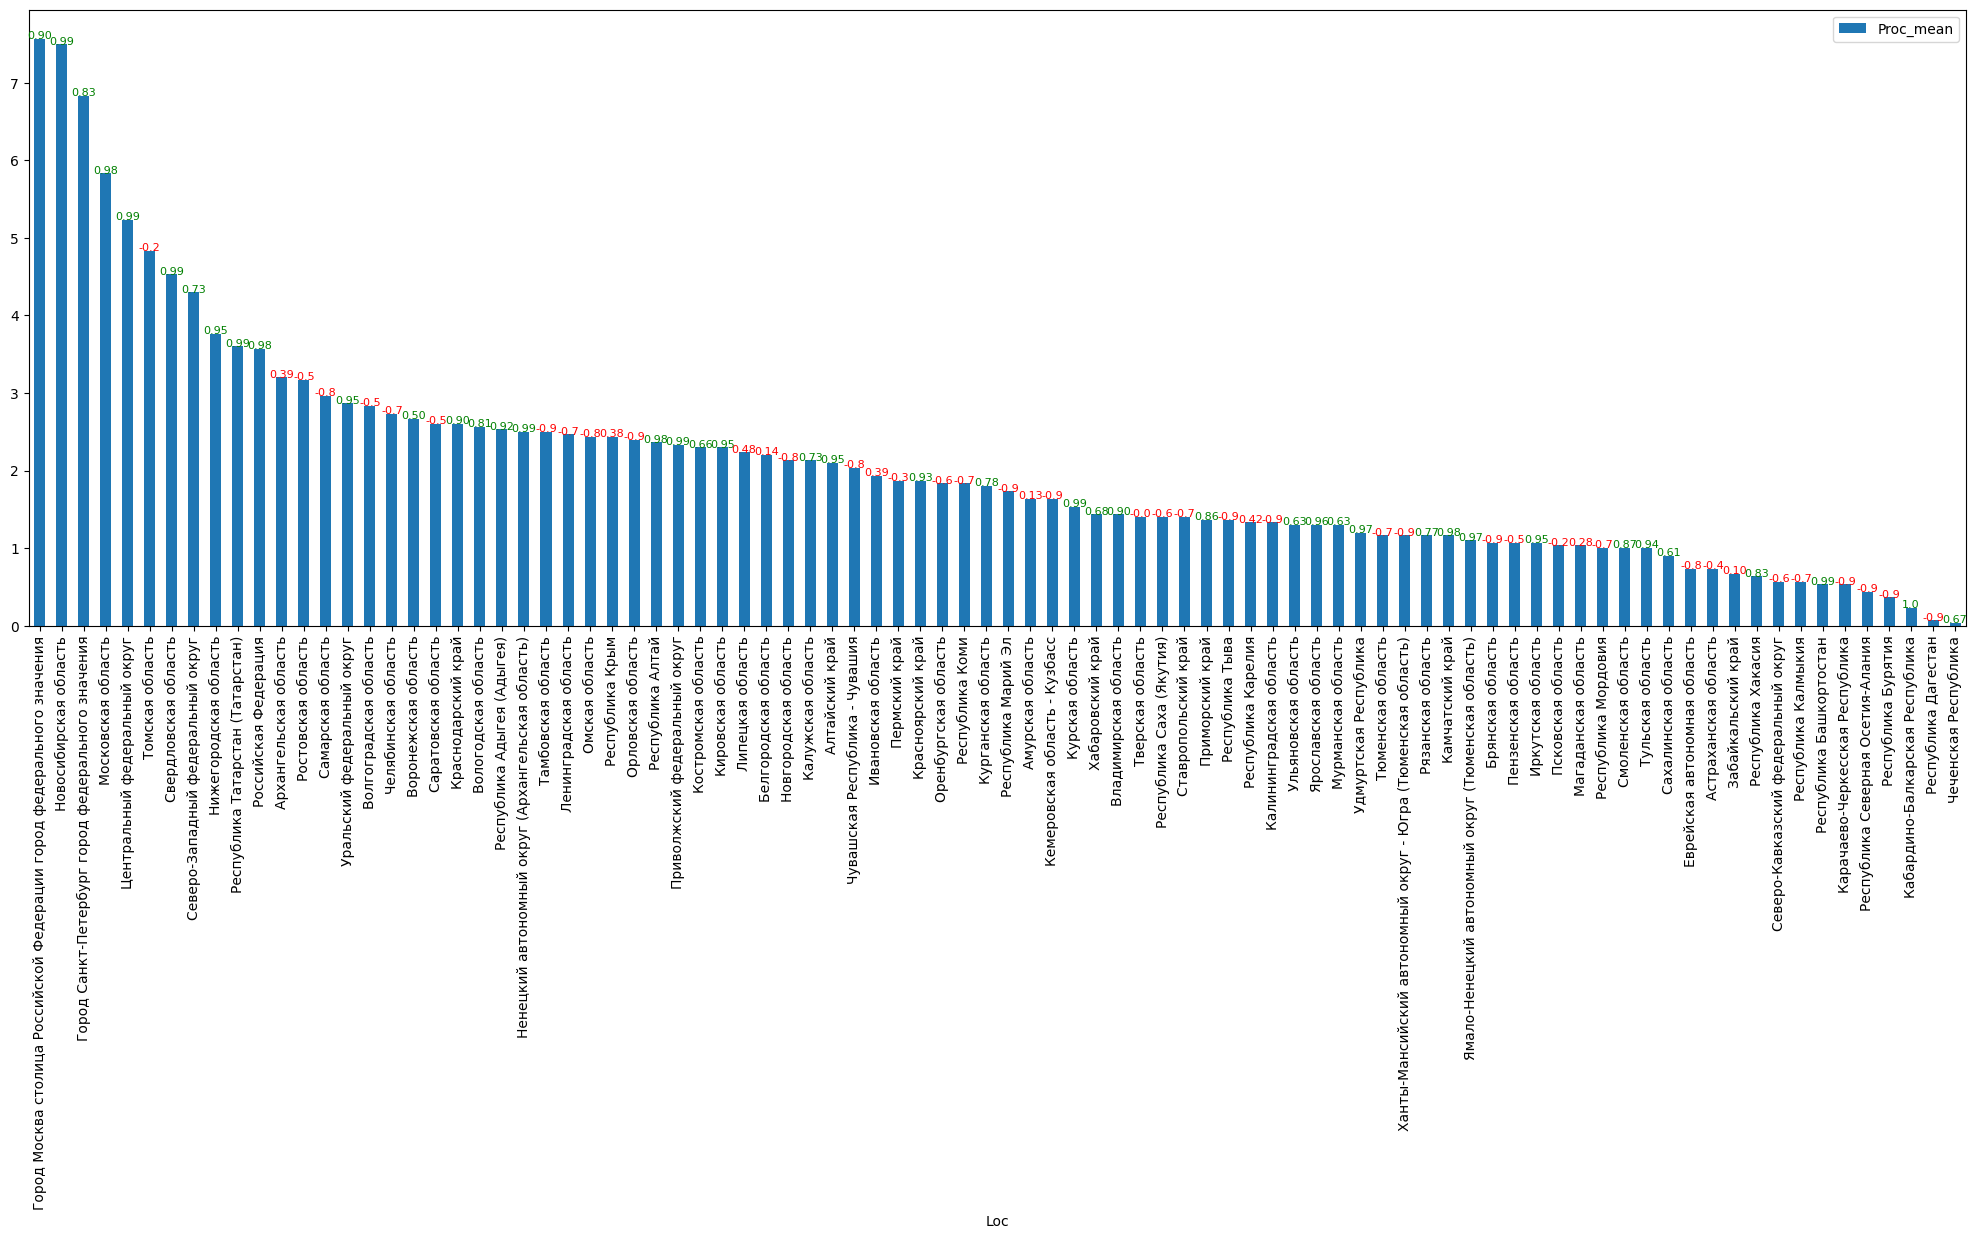

In [107]:
sorted_df_cor = df_cor.sort_values(by='Am_com_cor', ascending=False, ignore_index=True)
sorted2_df_cor = df_cor.sort_values(by='Am_cor', ascending=False, ignore_index=True)
sorted3_df_cor = df_cor.sort_values(by='Proc_mean', ascending=False, ignore_index=True)

def addlabels(x,y,t):
    for i in range(len(x)):
        if(t[i] > 0.5): 
            color = 'green' 
        else: 
            color = 'red'
        plt.text(i,y[i],str(t[i])[:4], fontsize=8, color=color, horizontalalignment='center')
#sorted3_df_cor.plot(x="Loc", y=["Am_cor", "Am_com_cor"], kind="bar", figsize=(20,8))
sorted3_df_cor.plot(x="Loc", y=["Proc_mean"], kind="bar", figsize=(25,8))

addlabels(sorted3_df_cor.Loc, sorted3_df_cor.Proc_mean, sorted3_df_cor.Am_com_cor)
#sorted_df_cor.plot(secondary_y=True, y="Proc_mean")
#sorted3_df_cor['Proc_mean'].plot(secondary_y=True, ylim=-6)


In [81]:
print(sorted3_df_cor)

                                                  Loc    Am_cor  Am_com_cor  \
19  Город Москва столица Российской Федерации горо...  0.998846    0.904976   
75                              Новосибирская область  0.991624    0.998184   
31  Город Санкт-Петербург город федерального значения  0.844860    0.838620   
11                                 Московская область  0.970830    0.985190   
1                       Центральный федеральный округ  0.661468    0.997270   
..                                                ...       ...         ...   
43                  Республика Северная Осетия-Алания  0.045051   -0.965288   
78                                 Республика Бурятия -0.088376   -0.995790   
41                    Кабардино-Балкарская Республика -0.775155    1.000000   
40                                Республика Дагестан  0.999905   -0.960014   
44                               Чеченская Республика  0.893673    0.675805   

    Proc_mean  
19   7.566667  
75   7.500000  
31 

<AxesSubplot: xlabel='Loc'>

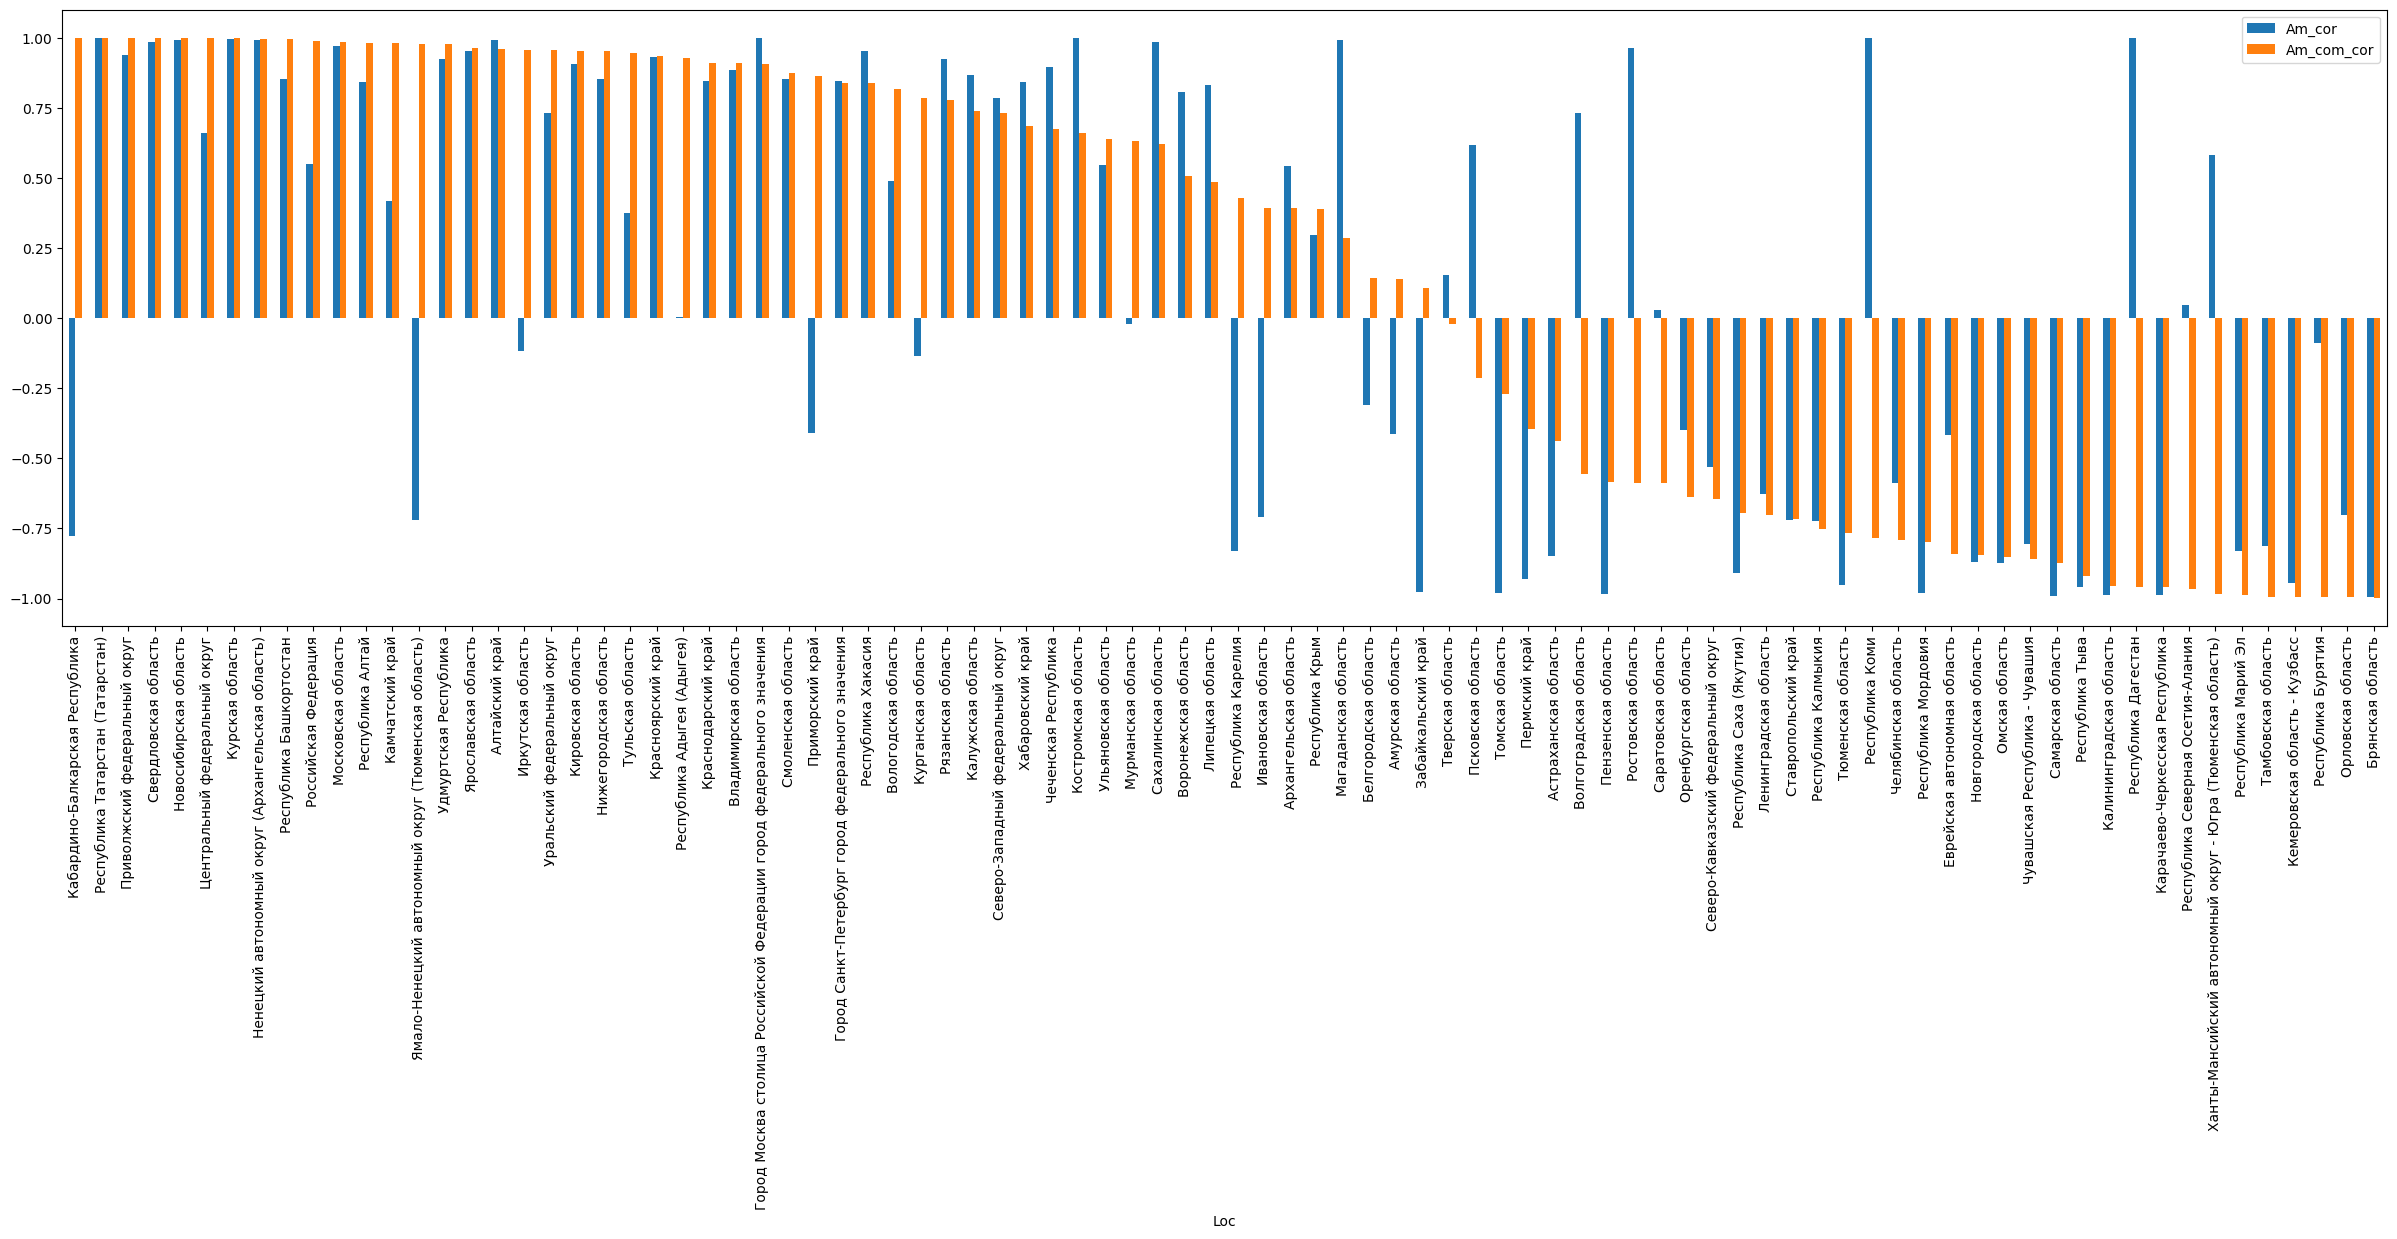

In [76]:
sorted_df_cor = df_cor.sort_values(by='Am_com_cor', ascending=False)

sorted_df_cor.plot(x="Loc", y=["Am_cor", "Am_com_cor"], kind="bar", figsize=(30,8))

In [156]:

print(df_all_data)

     Proc         Auto      Auto_Com
0     1.0  4229.319470  1.674088e+06
1     2.1  3884.406003  1.547062e+06
2     3.5  4099.152509  1.685685e+06
3     0.5  4511.110112  5.391311e+05
4     1.3  1395.868568  4.647621e+05
..    ...          ...           ...
198   1.2   594.374787  1.512920e+05
199   1.2   654.965437  4.096758e+05
200   0.3   125.093551  7.171000e+02
201   0.9   128.406294  1.754994e+02
202   1.0   114.286975  4.058269e+02

[203 rows x 3 columns]


In [185]:
import numpy as np


drop_index = np.where(df_all_data.Auto > 100000)
print(drop_index)


(array([  0,   1,   2,   3,   9,  10,  32,  51,  58,  62,  89,  90,  91,
       111, 112, 116, 117, 118, 125, 126, 127, 131, 132, 139, 140, 141,
       151, 152, 153, 157, 158, 171, 172, 173, 180], dtype=int64),)


In [186]:
df_all_data.drop(drop_index[0],inplace = True)

In [187]:
df_all_data.reset_index(drop=True, inplace=True)

<AxesSubplot: >

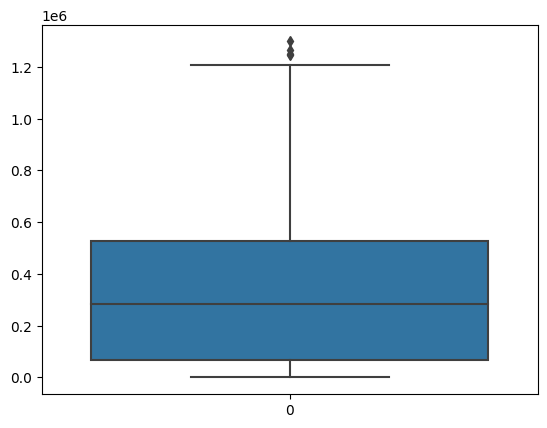

In [188]:
sns.boxplot(df_all_data.Auto_Com)


<AxesSubplot: >

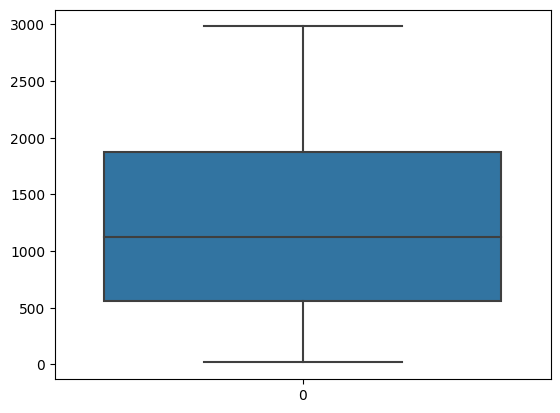

In [189]:
sns.boxplot(df_all_data.Auto)

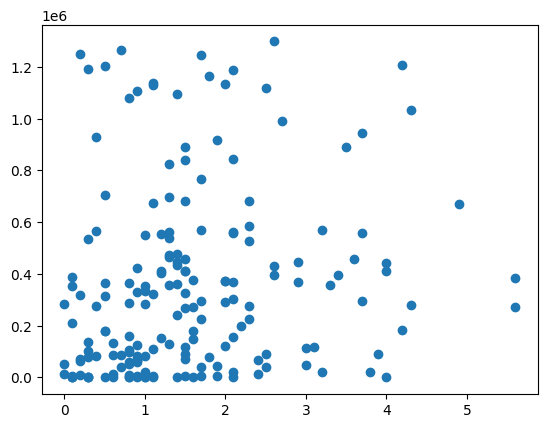

In [190]:
plt.scatter(df_all_data.Proc, df_all_data.Auto_Com)

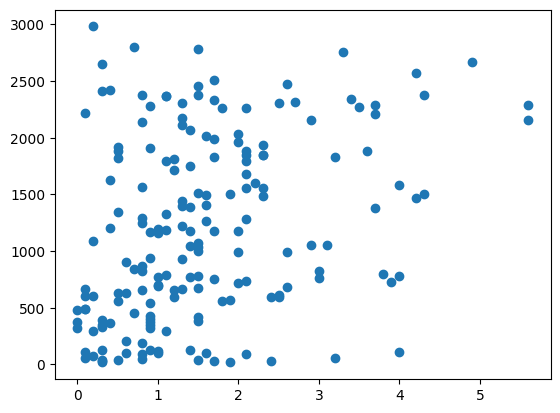

In [191]:
plt.scatter(df_all_data.Proc, df_all_data.Auto)

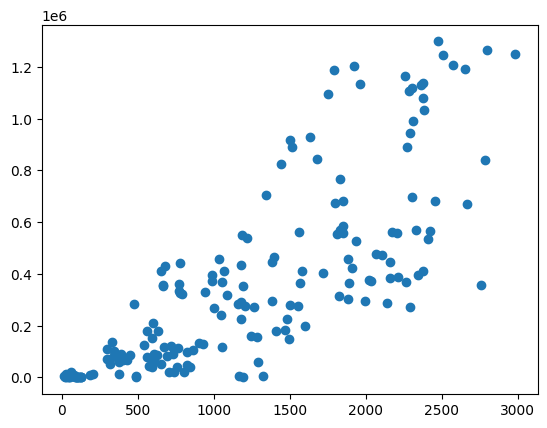

In [192]:
plt.scatter(df_all_data.Auto, df_all_data.Auto_Com)